# Exploratory Data Analysis - Factor Influencing 


## Introduction


* Objective: 
   - To see the distribution of the dataset
   - To do  statistical analysis and see the influencing factor for abroad study plan


* Target-  Plan to study aborad

In [1]:
#Print system version
!jupyter --version
import sys
print("Python version:", sys.version)

Selected Jupyter core packages...
IPython          : 8.12.0
ipykernel        : 6.22.0
ipywidgets       : 8.0.6
jupyter_client   : 8.2.0
jupyter_core     : 5.3.0
jupyter_server   : not installed
jupyterlab       : not installed
nbclient         : 0.7.3
nbconvert        : 7.3.1
nbformat         : 5.8.0
notebook         : 6.4.8
qtconsole        : not installed
traitlets        : 5.9.0
Python version: 3.10.10 | packaged by conda-forge | (main, Mar 24 2023, 20:12:31) [Clang 14.0.6 ]


In [2]:
# importing necessary libraries

import pandas as pd # for data manipulation and analysis
import collections # for creating and manipulating Python's collections like OrderedDict, defaultdict, Counter, etc.
import numpy as np # for scientific computing with Python
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline
import seaborn as sns # for advanced visualization

# For Statistical testing
from scipy.stats import ttest_ind # for computing t-test for two independent samples
import statsmodels.api as sm # for statistical models and tests
from scipy.stats import chi2_contingency # for computing chi-square statistic and p-value for a contingency table
import scipy.stats as stats # for implementing skewness and other stats
from scipy.stats import skew # for skewness


# For Feature Selection 
from sklearn.ensemble import ExtraTreesClassifier  # Extremely Randomized Trees.
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE #Recursive Feature Elimination (RFE)
from sklearn.feature_selection import mutual_info_classif # Mutual Score
from sklearn.linear_model import Lasso # Lasso Regularization
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 5000) # for setting the maximum number of columns to display in pandas dataframes
pd.set_option('display.max_rows', 5000) # for setting the maximum number of rows to display in pandas dataframes

In [3]:

#   Connecting datset
df= pd.read_csv('cleansurvey.csv')

# Exploratory Data Analysis

We need to explore/clean/filter it before processing it for machine learning It involves adding/deleting few columns or rows, joining some other data, and handling qualitative variables like dates.


In [4]:
df.shape

(101, 70)

In [5]:
df.tail()

,Gender,Age,Education Level,Marital Status,Household Males,Household Females,Educated Family Members,Oldest Child?,Younger Siblings,Older Siblings,Mother’s Education,Father’s Education,Parents’ Jobs,Family Income,Part-Time Work?,District,Family Abroad,Abroad Country,Plans to Study Abroad,Reasons for Staying,Target Study Abroad Country,Planned Year Abroad,Study Subject Abroad,Decision Difficulty,AI Tool Usefulness (1-10),Current Country,Study Start Date,Study Subject,Choosing Difficulty,AI Tool Usefulness (1-10).1,Education Quality,Career Prospects,Political Factors,Social Factors,Economic Factors,Safety/Security,University Preference,Language Access,Cultural Exposure,Research Opportunities,Environmental Factors,AI Familiarity,Key AI Factors,Valuable AI Insights,AI Bias Concerns,Trust in AI,Used AI Tools,Additional Comments,Quality Edu Ranking - A,Quality Edu Ranking - B,Career Rank -A,Career Rank -B,Political Rank -A,Political Rank -B,Social Rank -A,Social Rank -B,Economic Rank -A,Economic Rank -B,Safety Rank -A,Safety Rank -B,University Rank -A,University Rank -B,Language Rank -A,Language Rank -B,Cultural Rank -A,Cultural Rank -B,Research Rank -A,Research Rank -B,Environment Rank -A,Environment Rank -B
96,Non-binary,16-20,High School,Divorced,2,4,6,Yes,1,NaN,PhD,Bachelor's Degree,Business,"NPR 80,001 to NPR 1,10,000",No,Kathmandu,No,NaN,No plan to go,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Option B,Option A,Option A,Option B,Option A,Option B,Option B,Option A,Option B,Option B,Option B,Not familiar at all,Accuracy and reliability of the recommendation...,Estimating the total cost of studying and livi...,Neutral,Transparency about the data sources and algori...,None,NaN,NaN,"High tuition fees\n ,Moderate-quality educatio...","Higher paygrade\n ,Strong career prospects and...",NaN,Lower living expenses due to economic challeng...,NaN,NaN,"Lower cost of living in quieter areas\n ,Abund...",NaN,"Lower cost of living in rural areas\n ,Limited...",NaN,"Low crime rates,Efficient emergency services,A...",NaN,"Diverse availability of desired courses\n ,Mod...",No requirement for language proficiency tests ...,NaN,NaN,Limited cultural exposure and diversity on cam...,NaN,Abundant availability of research job opportun...,NaN,Lower cost of living in environmentally divers...
97,Male,21-25,High School,Married,2,2,4,No,NaN,1,High School,Master's Degree,Government Service,"NPR 80,001 to NPR 1,10,000",No,Kanchanpur,No,NaN,No plan to go,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Option A,Option A,Option B,Option A,Option B,Option A,Option B,Option B,Option B,Option B,Option B,Not familiar at all,Accuracy and reliability of the recommendation...,"Choosing a country or region,Selecting a speci...",Somewhat concerned,Explanations of the reasoning behind the recom...,Chat gpt,NaN,"Moderately priced tuition fees\n ,High-quality...",NaN,"Higher paygrade\n ,Strong career prospects and...",NaN,NaN,Higher living expenses due to economic challen...,Access to diverse social networks and communit...,NaN,Limited availability of affordable housing opt...,NaN,"Limited police presence\n ,Inadequate emergenc...",NaN,NaN,"Diverse availability of desired courses\n ,Mod...",NaN,Some level of language barrier may exist makin...,NaN,Limited cultural exposure and diversity on cam...,NaN,Abundant availability of research job opportun...,NaN,Lower cost of living in environmentally divers...
98,Male,21-25,Bachelor's Degree,Single,3,2,5,No,NaN,3,Below High School,Bachelor's Degree,Business,"NPR 30,001 to NPR 60,000",No,Kailali,No,NaN,No plan to go,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Option A,Option A,Option B,Option B,Option B,Option A,Option A,Option A,Option B,Option B,Option B,Moderately familiar,Accuracy and reliability of the recommendations,Selecting a specific university or program,Neutral,User reviews and ratings from other students,NaN,NaN,"High-quality education,Moderately priced tuiti...",NaN,"Higher paygrade\n ,Limited availability of par...",

Lets summarize the central tendency, dispersion and shape of dataset distribution

In [6]:
# Print summary statistics
df.describe()

,Household Males,Household Females,Educated Family Members,Reasons for Staying,Planned Year Abroad,AI Tool Usefulness (1-10),AI Tool Usefulness (1-10).1
count,101.000000,101.000000,101.000000,0.0,43.000000,43.000000,22.000000
mean,2.584158,2.465347,3.811881,NaN,2025.511628,7.093023,6.500000
std,1.450981,1.308162,1.354348,NaN,1.517706,2.136017,2.154729
min,1.000000,0.000000,1.000000,NaN,2024.000000,2.000000,2.000000
25%,2.000000,2.000000,3.000000,NaN,2024.000000,5.000000,5.250000
50%,2.000000,2.000000,4.000000,NaN,2025.000000,7.000000,7.000000
75%,3.000000,3.000000,4.000000,NaN,2026.000000,8.000000,8.000000
max,12.000000,10.000000,9.000000,NaN,2029.000000,10.000000,10.000000


* Average no of household male- 3
* Average no of household female- 2

In [7]:
df_copy = df.copy()

In [8]:
#listing the data shape
df.shape

(101, 70)

In [9]:
# Print the unique values of each column
for column in df.columns:
    print(f"Unique values in '{column}':")
    print(df[column].unique())
    print("\n")

Unique values in 'Gender':
['Male' 'Female' 'Non-binary']


Unique values in 'Age':
['21-25' '16-20' '26-30' '41-50' '31-40']


Unique values in 'Education Level':
['High School' "Bachelor's Degree" "Master's Degree" 'Below High School']


Unique values in 'Marital Status':
['Single' 'Married' 'Divorced']


Unique values in 'Household Males':
[ 2  4  3  1 12  5  7  6]


Unique values in 'Household Females':
[ 2  3  5  0 10  1  4  7  6]


Unique values in 'Educated Family Members':
[4 3 2 5 9 8 1 6]


Unique values in 'Oldest Child?':
['Yes' 'No']


Unique values in 'Younger Siblings':
['1' nan '3' '2' 'more than 5']


Unique values in 'Older Siblings':
[nan '2' '1' '3' '4' 'more than 5']


Unique values in 'Mother’s Education':
['PCL/+2' 'Illiterate' "Master's Degree" "Bachelor's Degree" 'Secondary'
 'Primary' 'Below High School' 'High School' 'PhD']


Unique values in 'Father’s Education':
["Bachelor's Degree" 'Primary' "Master's Degree" 'Illiterate' 'Secondary'
 'PCL/+2' 'PhD']


Uni

In [10]:
# the complete information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 70 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       101 non-null    object 
 1   Age                          101 non-null    object 
 2   Education Level              101 non-null    object 
 3   Marital Status               101 non-null    object 
 4   Household Males              101 non-null    int64  
 5   Household Females            101 non-null    int64  
 6   Educated Family Members      101 non-null    int64  
 7   Oldest Child?                101 non-null    object 
 8   Younger Siblings             49 non-null     object 
 9   Older Siblings               52 non-null     object 
 10  Mother’s Education           101 non-null    object 
 11  Father’s Education           101 non-null    object 
 12  Parents’ Jobs                101 non-null    object 
 13  Family Income       

In [11]:
# Dictionary to store the mappings
mappings = {}

# Define consistent mapping for Option A and Option B
consistent_mapping = {'Option A': 0, 'Option B': 1}

# List of columns to apply the consistent mapping
consistent_columns = [
    'Education Quality', 'Career Prospects', 'Political Factors', 
    'Social Factors', 'Economic Factors', 'Safety/Security', 
    'University Preference', 'Language Access', 'Cultural Exposure', 
    'Research Opportunities', 'Environmental Factors'
]

# List of columns to replace
columns_to_replace = df.columns  # Automatically replace all columns in df

# Apply replace to each column and store the mapping
for col in columns_to_replace:
    if df[col].dtype in ['int64', 'float64']:
        # Skip encoding for numerical columns
        continue
    elif col in consistent_columns:
        # Use the consistent mapping for specific columns
        df[col] = df[col].replace(consistent_mapping)
        mappings[col] = consistent_mapping
    else:
        # Generate and apply mapping for other non-numerical columns
        unique_vals = df[col].unique()
        val_map = {val: idx for idx, val in enumerate(unique_vals)}
        mappings[col] = val_map
        df[col] = df[col].replace(val_map)

# New DataFrame with numerical replacements
new_df = df.copy()

# Display the original mappings and the new DataFrame
print("Mappings:")
for col, mapping in mappings.items():
    print(f"{col}: {mapping}")

print("\nNew DataFrame with numerical values:")
print(new_df)

Mappings:
Gender: {'Male': 0, 'Female': 1, 'Non-binary': 2}
Age: {'21-25': 0, '16-20': 1, '26-30': 2, '41-50': 3, '31-40': 4}
Education Level: {'High School': 0, "Bachelor's Degree": 1, "Master's Degree": 2, 'Below High School': 3}
Marital Status: {'Single': 0, 'Married': 1, 'Divorced': 2}
Oldest Child?: {'Yes': 0, 'No': 1}
Younger Siblings: {'1': 0, nan: 1, '3': 2, '2': 3, 'more than 5': 4}
Older Siblings: {nan: 0, '2': 1, '1': 2, '3': 3, '4': 4, 'more than 5': 5}
Mother’s Education: {'PCL/+2': 0, 'Illiterate': 1, "Master's Degree": 2, "Bachelor's Degree": 3, 'Secondary': 4, 'Primary': 5, 'Below High School': 6, 'High School': 7, 'PhD': 8}
Father’s Education: {"Bachelor's Degree": 0, 'Primary': 1, "Master's Degree": 2, 'Illiterate': 3, 'Secondary': 4, 'PCL/+2': 5, 'PhD': 6}
Parents’ Jobs: {'Business': 0, 'Non-Governmental Service': 1, 'Government Service': 2, 'Agriculture': 3, 'Professor': 4, 'manager': 5, 'Officer': 6}
Family Income: {'NPR 60,001 to NPR 80,000': 0, 'NPR 30,001 to NPR

In [12]:
df_copy.head()

,Gender,Age,Education Level,Marital Status,Household Males,Household Females,Educated Family Members,Oldest Child?,Younger Siblings,Older Siblings,Mother’s Education,Father’s Education,Parents’ Jobs,Family Income,Part-Time Work?,District,Family Abroad,Abroad Country,Plans to Study Abroad,Reasons for Staying,Target Study Abroad Country,Planned Year Abroad,Study Subject Abroad,Decision Difficulty,AI Tool Usefulness (1-10),Current Country,Study Start Date,Study Subject,Choosing Difficulty,AI Tool Usefulness (1-10).1,Education Quality,Career Prospects,Political Factors,Social Factors,Economic Factors,Safety/Security,University Preference,Language Access,Cultural Exposure,Research Opportunities,Environmental Factors,AI Familiarity,Key AI Factors,Valuable AI Insights,AI Bias Concerns,Trust in AI,Used AI Tools,Additional Comments,Quality Edu Ranking - A,Quality Edu Ranking - B,Career Rank -A,Career Rank -B,Political Rank -A,Political Rank -B,Social Rank -A,Social Rank -B,Economic Rank -A,Economic Rank -B,Safety Rank -A,Safety Rank -B,University Rank -A,University Rank -B,Language Rank -A,Language Rank -B,Cultural Rank -A,Cultural Rank -B,Research Rank -A,Research Rank -B,Environment Rank -A,Environment Rank -B
0,Male,21-25,High School,Single,2,2,4,Yes,1,NaN,PCL/+2,Bachelor's Degree,Business,"NPR 60,001 to NPR 80,000",Yes,Doti,Yes,Australia,I am already in Abroad,NaN,NaN,NaN,NaN,NaN,NaN,Australia,01/06/2022,Business and Economics,Hard,3.0,Option A,Option B,Option B,Option A,Option A,Option B,Option B,Option B,Option A,Option A,Option A,Moderately familiar,Accuracy and reliability of the recommendations,Choosing a country or region,Neutral,Explanations of the reasoning behind the recom...,NaN,NaN,"Moderately priced tuition fees\n ,High-quality...",NaN,NaN,Abundant availability of part-time job opportu...,NaN,Higher living expenses due to economic challen...,Higher cost of living in socially vibrant urba...,NaN,Access to diverse job opportunities with compe...,NaN,NaN,"Active police presence,Efficient emergency ser...",NaN,Moderately prestige and reputation of universi...,NaN,Different primary language spoken requiring la...,Rich cultural exposure and diversity on campus...,NaN,Abundant research opportunities and resources ...,NaN,Access to clean and sustainable living environ...,NaN
1,Male,21-25,Bachelor's Degree,Single,4,2,3,No,NaN,2,Illiterate,Primary,Non-Governmental Service,"NPR 60,001 to NPR 80,000",Yes,Banke,No,NaN,Yes,NaN,Canada,2026.0,Business and Economics,Hard,8.0,NaN,NaN,NaN,NaN,NaN,Option A,Option A,Option B,Option A,Option A,Option B,Option B,Option A,Option A,Option A,Option A,Slightly familiar,Accuracy and reliability of the recommendation...,"Choosing a country or region,Selecting a speci...",Somewhat concerned,Transparency about the data sources and algori...,NaN,NaN,"High-quality education,Moderately priced tuiti...",NaN,"Higher paygrade\n ,Strong career prospects and...",NaN,NaN,Limited access to civil liberties and freedom ...,Access to diverse social networks and communit...,NaN,Access to diverse job opportunities with compe...,NaN,NaN,"Active police presence,Efficient emergency ser...",NaN,"Diverse availability of desired courses\n ,Mor...",Communication is generally easy due to fluency...,NaN,Rich cultural exposure and diversity on campus...,NaN,Abundant research opportunities and resources ...,NaN,Access to clean and sustainable living environ...,NaN
2,Female,16-20,High School,Single,2,2,2,Yes,1,NaN,Master's Degree,Bachelor's Degree,Non-Governmental Service,"NPR 30,001 to NPR 60,000",No,Kathmandu,No,NaN,Yes,NaN,New Zealand,2025.0,"Humanities (Languages, Literature, History, Ph...",Hard,7.0,NaN,NaN,NaN,NaN,NaN,Option A,Option A,Option B,Option B,Option A,Option B,Option B,Option A,Option B,Option B,Option B,Moderately familiar,Accuracy and reliability of the recommendations,Finding scholarship or financial aid opportuni...,Not very concerned,Endorsements or certifications from reputable ...,NaN,NaN,"Moderately pr


* Dataset contains 101 records with 70 features
* Memory usages if 55.4+ KBwhish is easy to process on local machine
* The data seems to  be clean with zero missing values



Now we will be creating the copy of data so that we avoid the mistake of modifying the data

The thus created data will mapped with naming convention so that we can easily visualize it:
   
similary, 
* 0: 'Male'
* 1: 'Female'
    
   

In [13]:
# # Define custom hex colors
custom_colors_gender = ['#227c9d', '#17c3b2','#ffcb77']

# Set a minimalistic style
sns.set(style="whitegrid")


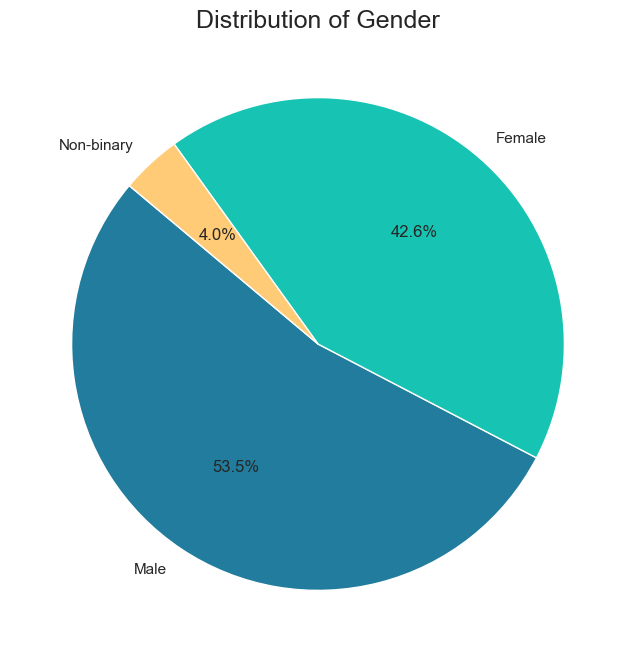

In [14]:
result_counts = df_copy['Gender'].value_counts()


# Create the pie chart
plt.figure(figsize=(8, 8))  # Set the size of the figure

# Create the pie chart
plt.pie(
    result_counts,
    labels=result_counts.index,
    autopct='%1.1f%%',
    colors=custom_colors_gender,
    startangle=140  # Start the pie chart at a specific angle
)

# Add a title
plt.title('Distribution of Gender', fontsize=18)
plt.savefig('Distribution of Gender.png')
# Show the pie chart
plt.show()


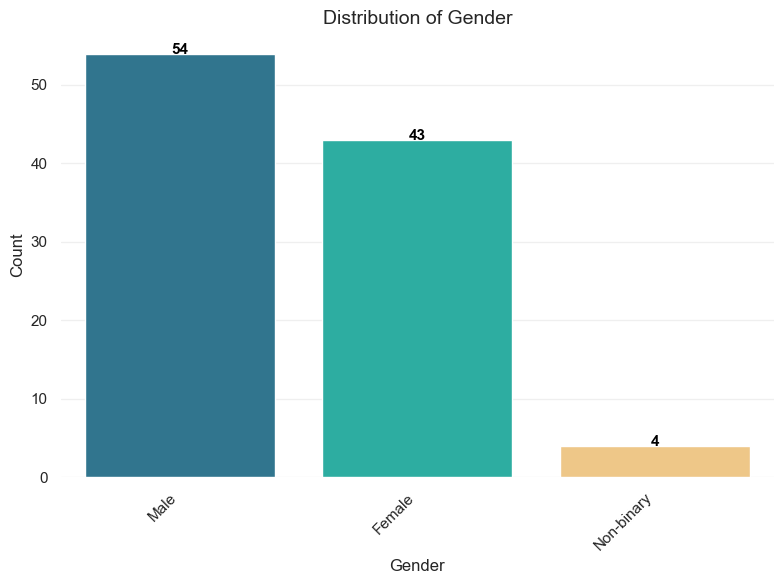

In [15]:

plt.figure(figsize=(8, 6))

ax = sns.countplot(data=df_copy, x='Gender', palette=custom_colors_gender)
    
# Add data labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=11, color='black', fontweight='bold')
    
plt.title('Distribution of Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Remove spines
sns.despine()

 # Remove vertical lines from the grid
plt.grid(axis='y', alpha=0.3)
plt.gca().xaxis.grid(False)
    # Remove spines
sns.despine(left=True, bottom=True)

# Show the plot
plt.tight_layout()
plt.show()

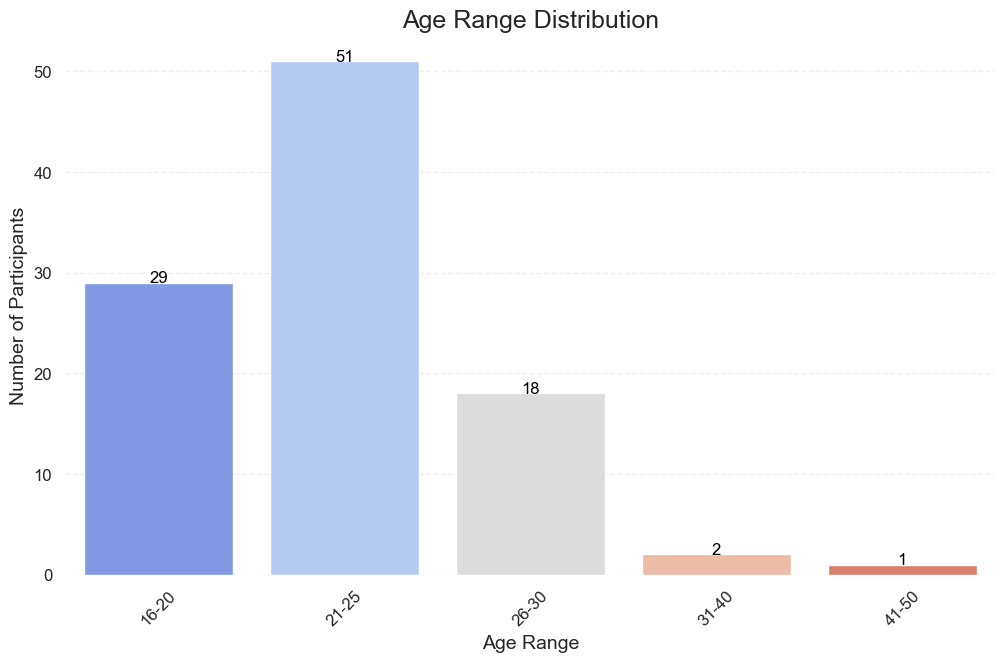

In [16]:

# Calculate the age range distribution
age_counts = df_copy['Age'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=age_counts.index, y=age_counts.values, palette="coolwarm")

# Adding titles and labels with improved font settings
plt.title('Age Range Distribution', fontsize=18)
plt.xlabel('Age Range', fontsize=14)
plt.ylabel('Number of Participants', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Adding value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                fontsize=12, color='black')

# Adding a grid for better readability of the plot
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.gca().xaxis.grid(False)
# Remove spines
sns.despine(left=True, bottom=True)


plt.savefig('Age range distribution.png')
plt.show()

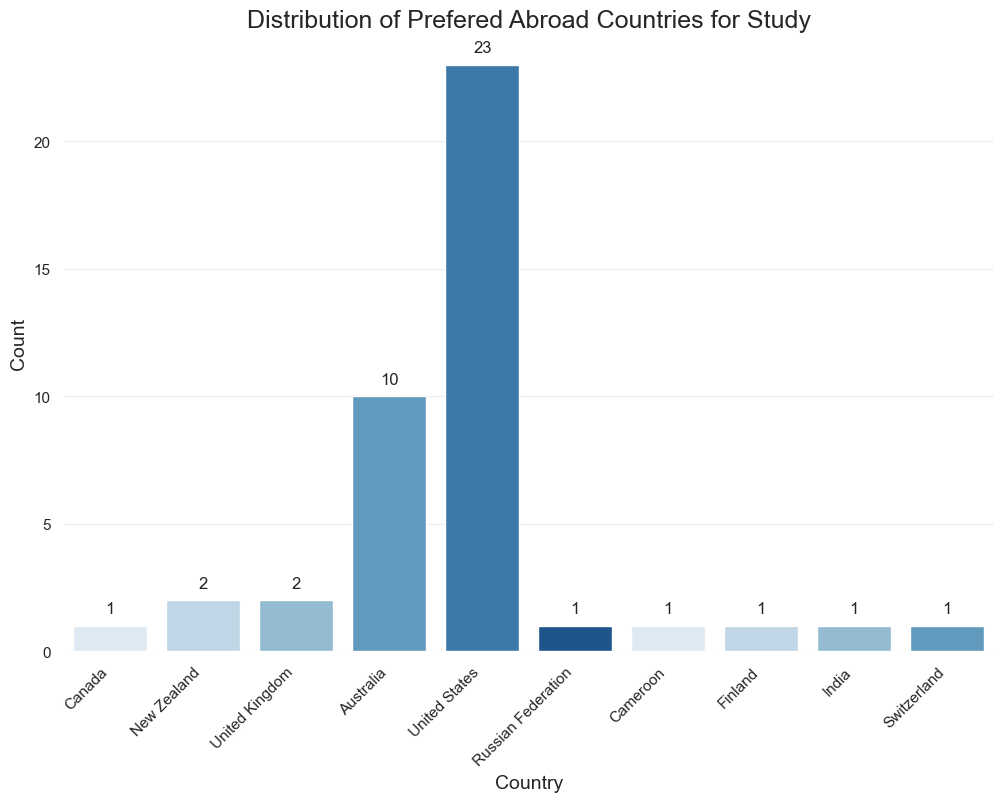

In [17]:


# Set a monochromatic, subtle color palette
custom_colors = sns.color_palette("Blues")

# Set figure size
plt.figure(figsize=(12, 8))

# Create a count plot of the target study abroad country
ax = sns.countplot('Target Study Abroad Country', data=df_copy, palette=custom_colors)

# Add a title and axis labels
plt.title('Distribution of Prefered Abroad Countries for Study', fontsize=18)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add labels to the bars with minimal distance above the bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5, '{:,.0f}'.format(p.get_height()), ha='center', fontsize=12)

# Rotate x-axis labels if needed
plt.xticks(rotation=45, ha='right')

# Add gridlines for better readability
ax.yaxis.grid(True)
ax.set_axisbelow(True)


 # Remove vertical lines from the grid
plt.grid(axis='y', alpha=0.3)
plt.gca().xaxis.grid(False)
# Remove spines
sns.despine(left=True, bottom=True)


plt.savefig('Distribution of Prefered Abroad Countries for Study.png')
# Show the plot
plt.show()


In [18]:
# Count the number of occurrences of each unique value in the 'Result' column
result_counts = df_copy['Target Study Abroad Country'].value_counts()

# Print the counts of the two categories
print(result_counts)

# Check if the two categories are balanced or not
if result_counts[0] == result_counts[1]:
    print('The two categories are balanced.')
else:
    print('The two categories are not balanced.')
    
# print("-----")    
# # The classes are heavily skewed we need to solve this issue later.
# print('Non Anemic', round(df['Result'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
# print('Anemic', round(df['Result'].value_counts()[1]/len(df) * 100,2), '% of the dataset')   
    

United States         23
Australia             10
New Zealand            2
United Kingdom         2
Canada                 1
Russian Federation     1
Cameroon               1
Finland                1
India                  1
Switzerland            1
Name: Target Study Abroad Country, dtype: int64
The two categories are not balanced.


Here we see the categories are not balanced and we need to address the class imbalance in our data before building a predictive model. 

Imbalanced classes can cause issues in machine learning models, as the model may be biased towards the majority class and may not perform well on the minority class.

Most of the class are non-Anemic. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most class are non anemic.


Cross-tabulation of Family Income vs. Plans to Study Abroad:
Plans to Study Abroad         I am already in Abroad  No plan to go  Yes
Family Income                                                           
Below NPR 30,000                                   1              5    5
NPR 1,10,001 to NPR 2,00,000                       5              3   10
NPR 2,00,001 to NPR 500,000                        1              2    2
NPR 30,001 to NPR 60,000                           7             13   13
NPR 60,001 to NPR 80,000                           4              7    9
NPR 80,001 to NPR 1,10,000                         3              5    3
Over NPR 5,00,000                                  1              1    1


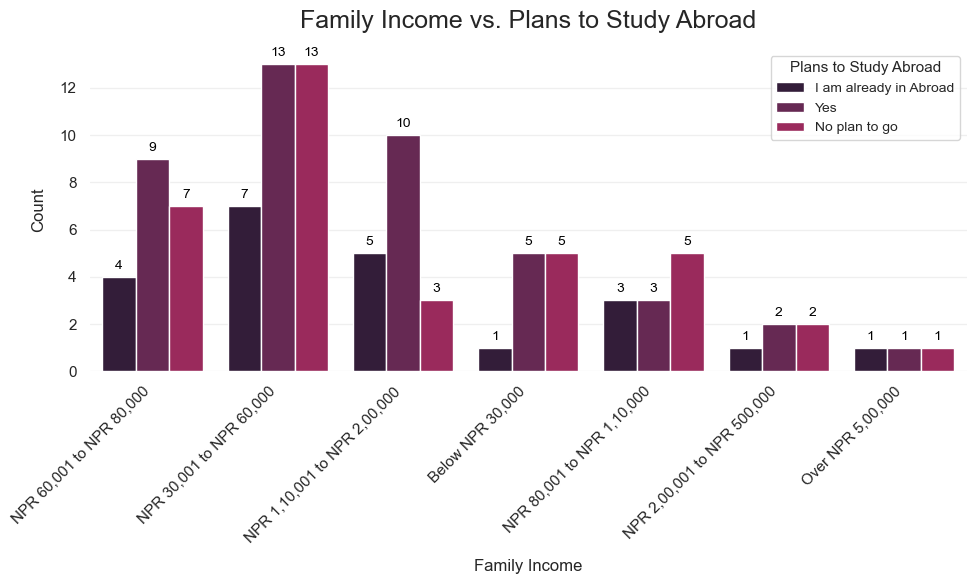

In [19]:
# Set a diverse color palette using "rocket"
diverse_palette = sns.color_palette("rocket")

# Display the cross-tabulation (if needed)
crosstab = pd.crosstab(df_copy['Family Income'], df_copy['Plans to Study Abroad'])
print("Cross-tabulation of Family Income vs. Plans to Study Abroad:")
print(crosstab)

# Plot the relationship using a minimalistic bar plot with the "rocket" palette
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_copy, x='Family Income', hue='Plans to Study Abroad', palette=diverse_palette)

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 8), 
                textcoords = 'offset points',
                fontsize=10, color='black')

# Remove the spines
sns.despine()

# Simplify axis labels and title
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel('Family Income', fontsize=12, labelpad=10)
plt.ylabel('Count', fontsize=12, labelpad=10)
plt.title('Family Income vs. Plans to Study Abroad', fontsize=18, pad=15)
plt.legend(title='Plans to Study Abroad', fontsize=10, title_fontsize=11)


 # Remove vertical lines from the grid
plt.grid(axis='y', alpha=0.3)
plt.gca().xaxis.grid(False)
    # Remove spines
sns.despine(left=True, bottom=True)
# Adjust the layout
plt.tight_layout()

plt.savefig("amily Income vs. Plans to Study Abroad.png")
# Show the plot
plt.show()

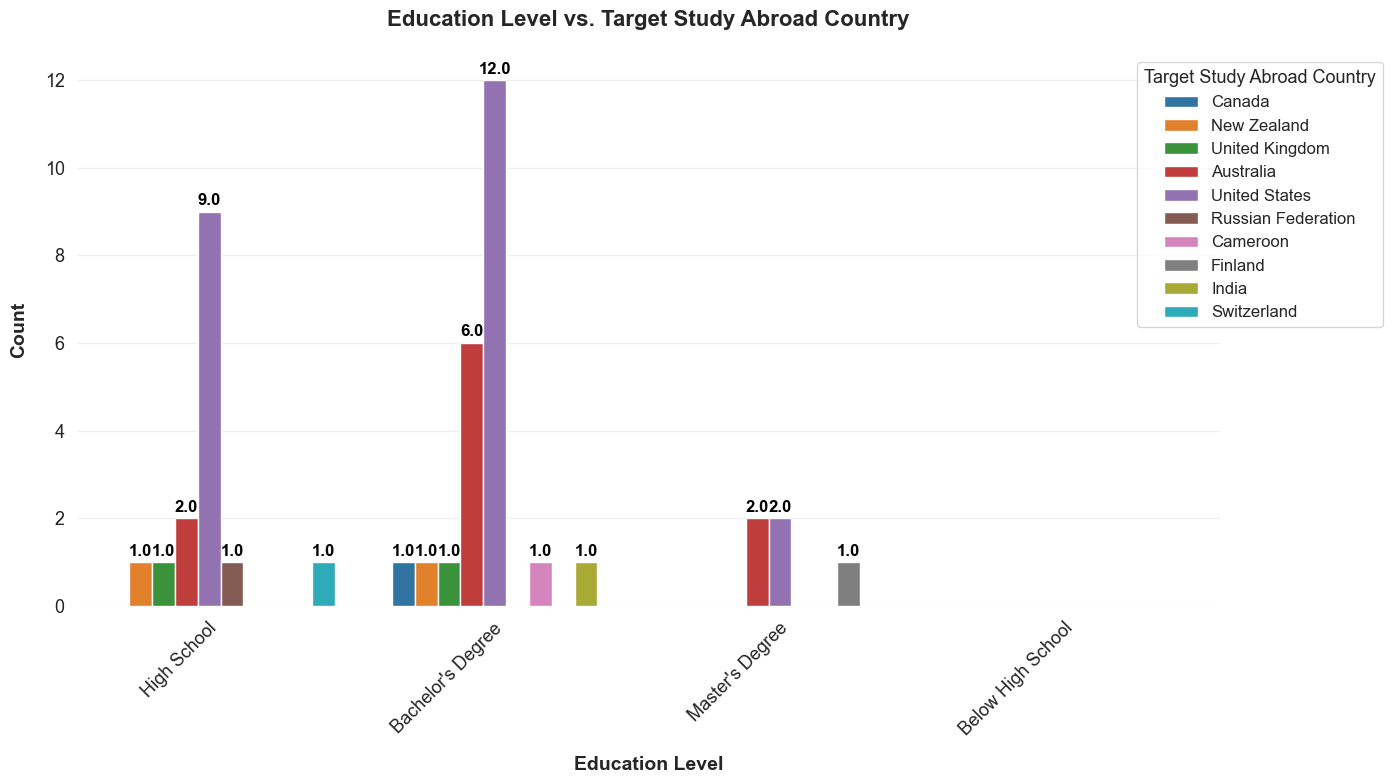

In [20]:
# Set a minimalistic style with a grid for better readability
sns.set(style="whitegrid")

# Use a more refined color palette
refined_palette = sns.color_palette("tab10")

# Plot the relationship using a more polished bar plot
plt.figure(figsize=(14, 8))
ax = sns.countplot(data=df_copy, x='Education Level', hue='Target Study Abroad Country', palette=refined_palette)

# Add values on top of the bars with better font properties
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 8), 
                textcoords='offset points',
                fontsize=12, fontweight='bold', color='black')



  # Remove vertical lines from the grid
plt.grid(axis='y', alpha=0.3)
plt.gca().xaxis.grid(False)
    # Remove spines
sns.despine(left=True, bottom=True)

# Customize axis labels and title with more appropriate font properties
plt.xticks(rotation=45, ha='right', fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Education Level', fontsize=14, labelpad=12, fontweight='bold')
plt.ylabel('Count', fontsize=14, labelpad=12, fontweight='bold')
plt.title('Education Level vs. Target Study Abroad Country', fontsize=16, pad=20, fontweight='bold')

# Enhance the legend
plt.legend(title='Target Study Abroad Country', fontsize=12, title_fontsize=13, loc='upper right', bbox_to_anchor=(1.15, 1))

# Adjust the layout to prevent clipping and overlap
plt.tight_layout()

# Show the plot
plt.show()

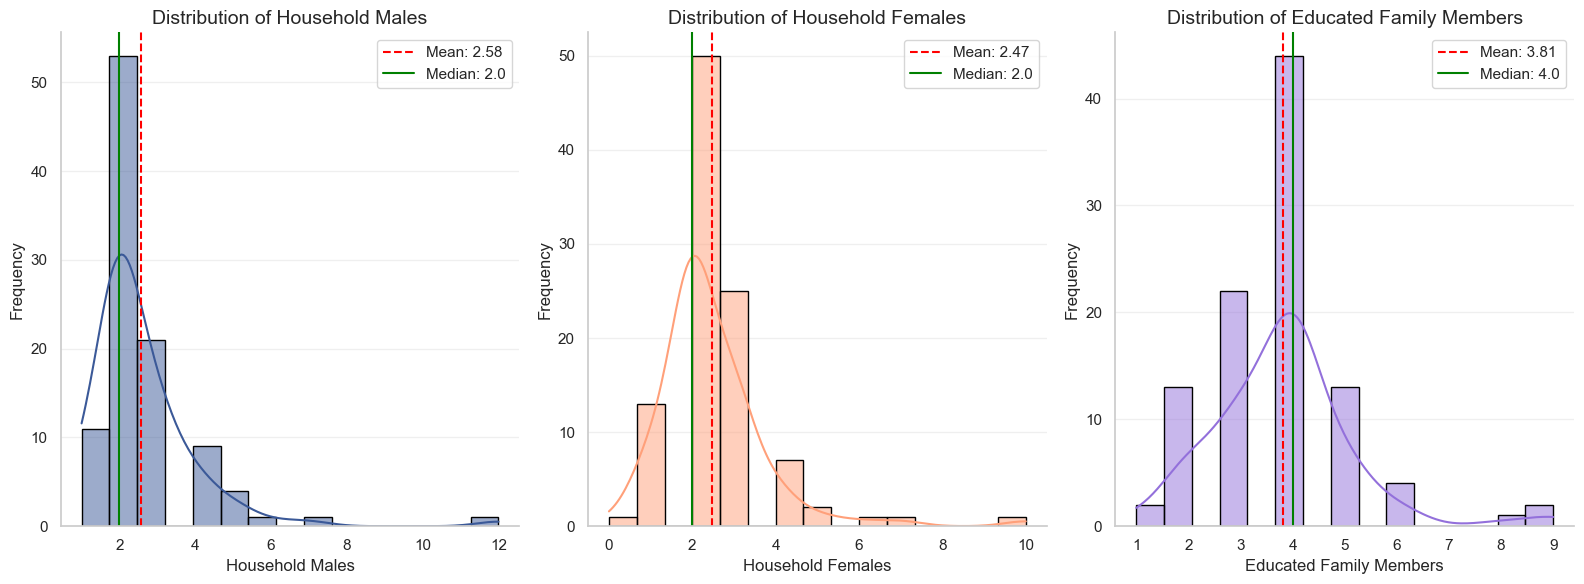

In [21]:


# Create subplots
plt.figure(figsize=(16, 6))
colors = ['#3b5998', '#ffa07a', '#9370db'] 

for i, column in enumerate(['Household Males', 'Household Females', 'Educated Family Members']):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[column], kde=True, bins=15, color=colors[i], edgecolor='black')
    
    # Highlight mean and median
    mean_value = round(df[column].mean(), 2)  # Rounded mean
    median_value = round(df[column].median(), 2)  # Rounded median
    plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value}')
    plt.axvline(median_value, color='green', linestyle='-', label=f'Median: {median_value}')
    
      # Remove vertical lines from the grid
    plt.grid(axis='y', alpha=0.3)
    plt.gca().xaxis.grid(False)
    # Remove spines
    sns.despine(left=True, bottom=True)
    
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
   
    # Display legend
    plt.legend()
    

 # Remove the spines
sns.despine()
    
# Adjust layout for better spacing
plt.tight_layout()

plt.savefig("househild distribution.png")

# Show the plot
plt.show()

In [22]:
# Calculate skewness for the specified columns
skew_values = {
    'Household Males': skew(df['Household Males']),
    'Household Females': skew(df['Household Females']),
    'Educated Family Members': skew(df['Educated Family Members'])
}

# Convert to a DataFrame for better presentation
skewness_df = pd.DataFrame(list(skew_values.items()), columns=['Category', 'Skewness'])

# Round skewness values to 2 decimal places
skewness_df['Skewness'] = skewness_df['Skewness'].round(2)

# Display the table
print(skewness_df)

                  Category  Skewness
0          Household Males      3.26
1        Household Females      2.54
2  Educated Family Members      1.15


- Household Males: 3.26 (highly skewed): The majority of households have a low number of males, but a few households have a significantly higher number
- Household Females: 2.54 (moderately skewed): Similar to males, most households have a smaller number of females, but some have considerably more.
- Educated Family Members: 1.15 (slightly skewed: distribution is closer to normal, but there is still a mild tendency towards higher values. This suggests that while the majority of households have a moderate number of educated family members, there are some with a higher-than-average count.

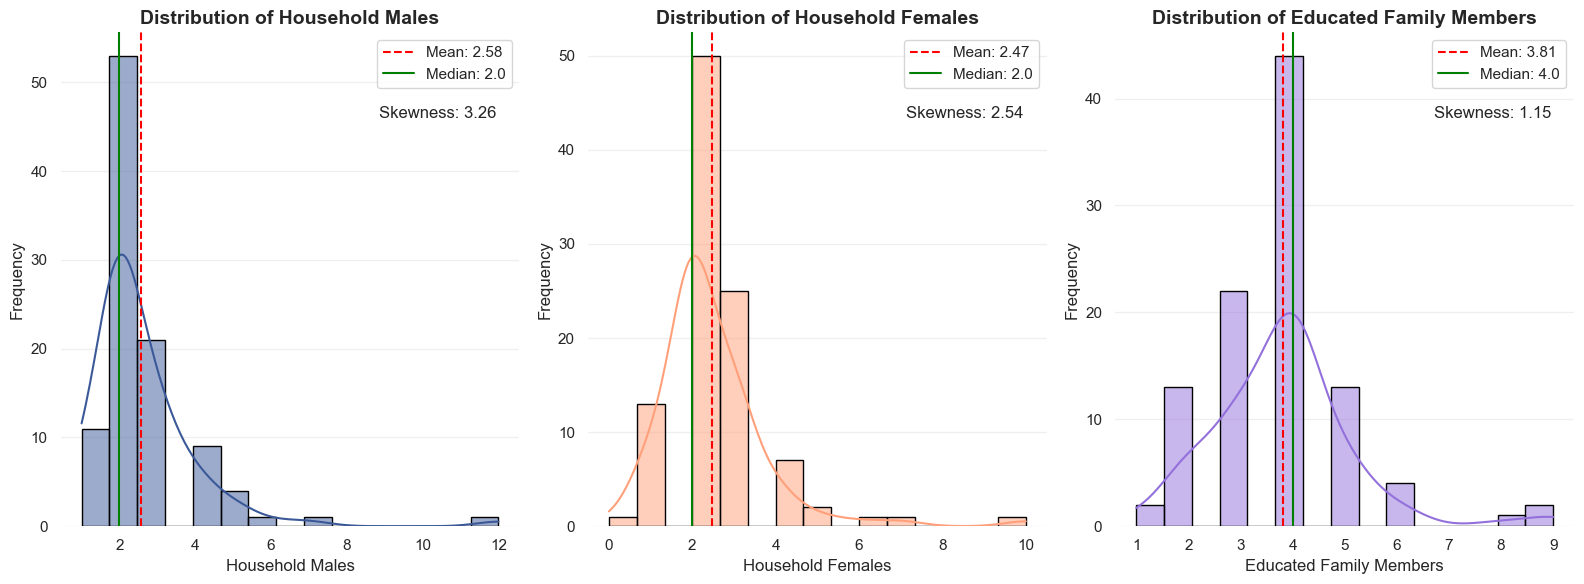

In [23]:


# Create subplots
plt.figure(figsize=(16, 6))
colors = ['#3b5998', '#ffa07a', '#9370db']  # Custom colors for each plot

for i, column in enumerate(['Household Males', 'Household Females', 'Educated Family Members']):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[column], kde=True, bins=15, color=colors[i], edgecolor='black')
    
    # Highlight mean and median
    mean_value = round(df[column].mean(), 2)  # Rounded mean
    median_value = round(df[column].median(), 2)  # Rounded median
    plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value}')
    plt.axvline(median_value, color='green', linestyle='-', label=f'Median: {median_value}')
    
    # Remove vertical lines from the grid
    plt.grid(axis='y', alpha=0.3)
    plt.gca().xaxis.grid(False)
    # Remove spines
    sns.despine(left=True, bottom=True)
    
    # Calculate and display skewness
    skewness_value = round(skew(df[column]), 2)
    plt.text(0.95, 0.85, f'Skewness: {skewness_value}', fontsize=12, transform=plt.gca().transAxes, 
             verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.6))
    
    plt.title(f'Distribution of {column}', fontsize=14, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
    # Display legend
    plt.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


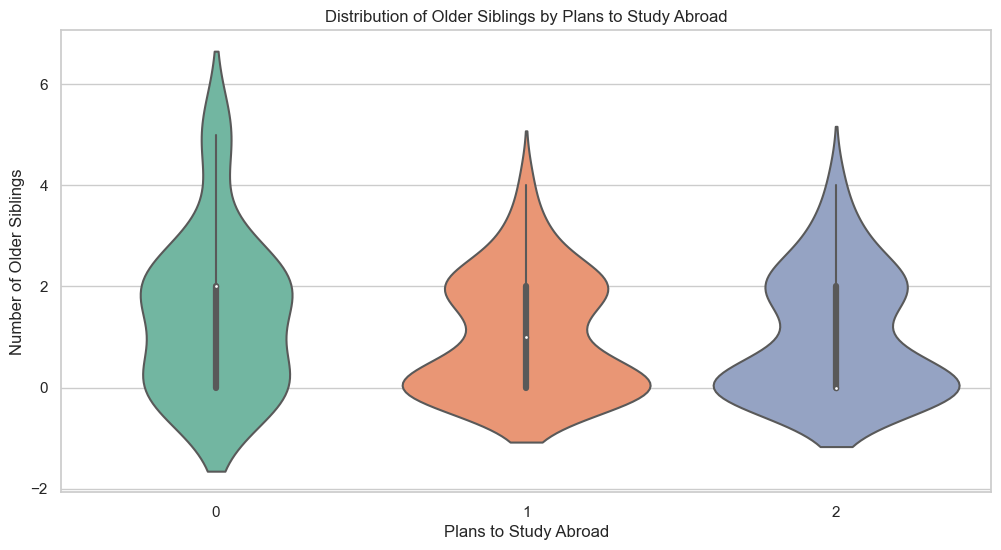

In [24]:
# Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Plans to Study Abroad', y='Older Siblings', palette='Set2')
plt.title('Distribution of Older Siblings by Plans to Study Abroad')
plt.xlabel('Plans to Study Abroad')
plt.ylabel('Number of Older Siblings')
plt.show()


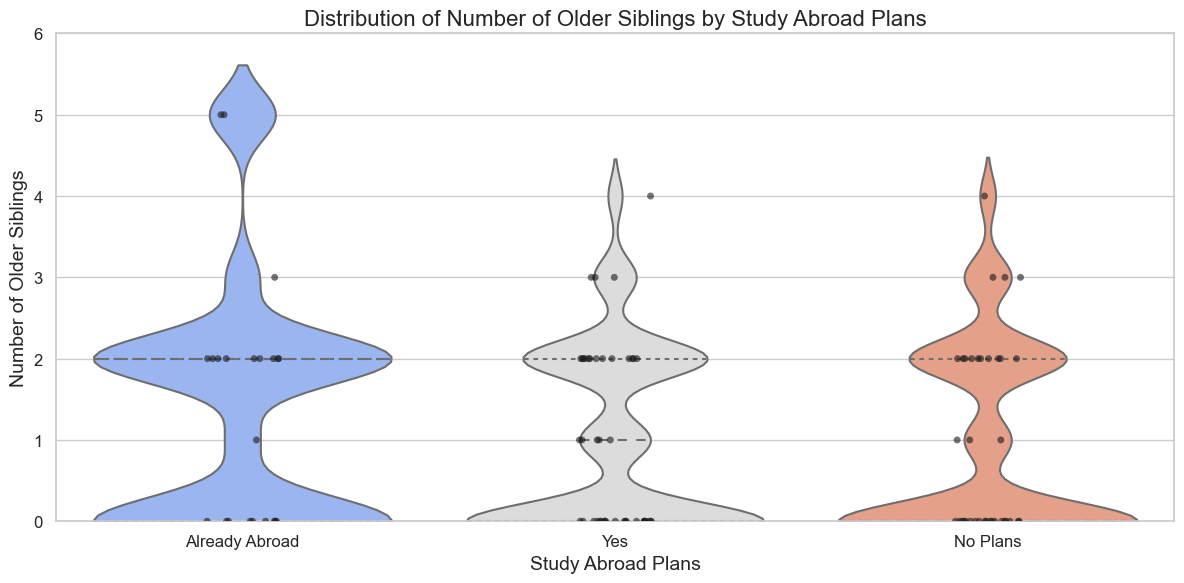

In [25]:
# Assuming 'df' is your DataFrame and 'Plans to Study Abroad' and 'Older Siblings' are the relevant columns
plt.figure(figsize=(12, 6))

# Improved Violin Plot with a cooler color palette and data points overlay
sns.violinplot(
    data=df, 
    x='Plans to Study Abroad', 
    y='Older Siblings', 
    palette=sns.color_palette("coolwarm", 3),  # Color palette that shows progression
    inner='quartile',  # Show quartiles inside the violin plots
    scale='width',     # Scale violins to have the same width, making them easier to compare
    bw=0.2             # Adjust bandwidth for smoother violin shapes
)

# Overlaying data points on the violin plot
sns.stripplot(
    data=df, 
    x='Plans to Study Abroad', 
    y='Older Siblings', 
    color='k',  # Black color for the points
    alpha=0.6,  # Slight transparency for better visibility
    jitter=True # Spread out points to avoid overlap
)

# Title and labels with more descriptive text
plt.title('Distribution of Number of Older Siblings by Study Abroad Plans', fontsize=16)
plt.xlabel('Study Abroad Plans', fontsize=14)
plt.ylabel('Number of Older Siblings', fontsize=14)

# Adjust y-axis to start from 0
plt.ylim(0, df['Older Siblings'].max() + 1)

# Custom Tick Labels
plt.xticks(
    ticks=[0, 1, 2], 
    labels=['Already Abroad', 'Yes', 'No Plans'], 
    fontsize=12
)
plt.yticks(fontsize=12)

# Adjusting layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

In [26]:
df.columns

Index(['Gender', 'Age', 'Education Level', 'Marital Status', 'Household Males',
       'Household Females', 'Educated Family Members', 'Oldest Child?',
       'Younger Siblings', 'Older Siblings', 'Mother’s Education',
       'Father’s Education', 'Parents’ Jobs', 'Family Income',
       'Part-Time Work?', 'District', 'Family Abroad', 'Abroad Country',
       'Plans to Study Abroad', 'Reasons for Staying',
       'Target Study Abroad Country', 'Planned Year Abroad',
       'Study Subject Abroad', 'Decision Difficulty',
       'AI Tool Usefulness (1-10)', 'Current Country', 'Study Start Date',
       'Study Subject', 'Choosing Difficulty', 'AI Tool Usefulness (1-10).1',
       'Education Quality', 'Career Prospects', 'Political Factors',
       'Social Factors', 'Economic Factors', 'Safety/Security',
       'University Preference', 'Language Access', 'Cultural Exposure',
       'Research Opportunities', 'Environmental Factors', 'AI Familiarity',
       'Key AI Factors', 'Valuable AI Ins

In [27]:
df.columns

Index(['Gender', 'Age', 'Education Level', 'Marital Status', 'Household Males',
       'Household Females', 'Educated Family Members', 'Oldest Child?',
       'Younger Siblings', 'Older Siblings', 'Mother’s Education',
       'Father’s Education', 'Parents’ Jobs', 'Family Income',
       'Part-Time Work?', 'District', 'Family Abroad', 'Abroad Country',
       'Plans to Study Abroad', 'Reasons for Staying',
       'Target Study Abroad Country', 'Planned Year Abroad',
       'Study Subject Abroad', 'Decision Difficulty',
       'AI Tool Usefulness (1-10)', 'Current Country', 'Study Start Date',
       'Study Subject', 'Choosing Difficulty', 'AI Tool Usefulness (1-10).1',
       'Education Quality', 'Career Prospects', 'Political Factors',
       'Social Factors', 'Economic Factors', 'Safety/Security',
       'University Preference', 'Language Access', 'Cultural Exposure',
       'Research Opportunities', 'Environmental Factors', 'AI Familiarity',
       'Key AI Factors', 'Valuable AI Ins

In [28]:
# Subsetting the data for counts
oldest_counts = df[df['Oldest Child?'] == 0]['Plans to Study Abroad'].value_counts().sort_index()
non_oldest_counts = df[df['Oldest Child?'] == 1]['Plans to Study Abroad'].value_counts().sort_index()

# Map numeric codes back to human-readable labels
plan_labels = {0: 'Already Abroad', 1: 'Yes', 2: 'No Plan to Go'}
oldest_counts.index = oldest_counts.index.map(plan_labels)
non_oldest_counts.index = non_oldest_counts.index.map(plan_labels)

# 2. Create a DataFrame for easy plotting
comparison_df = pd.DataFrame({
    'Oldest Child': oldest_counts,
    'Not Oldest Child': non_oldest_counts
}).reset_index()

<Figure size 1000x600 with 0 Axes>

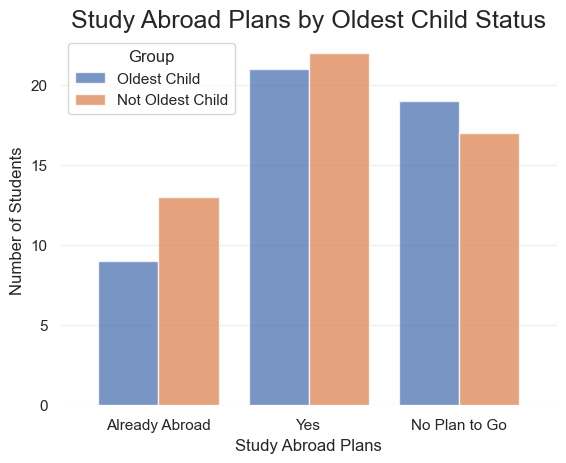

In [29]:
# 3.Abroad and oldest child
plt.figure(figsize=(10, 6))
comparison_df.set_index('index').plot(kind='bar', width=0.8, alpha=0.75)
plt.title('Study Abroad Plans by Oldest Child Status',fontsize=18)
plt.xlabel('Study Abroad Plans')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.legend(title='Group')
# Remove vertical lines from the grid
plt.grid(axis='y', alpha=0.3)
plt.gca().xaxis.grid(False)
    # Remove spines
sns.despine(left=True, bottom=True)


plt.savefig("studyaborad and oldest.png")

plt.show()

In [30]:
# Statistical Test: Chi-Square Test of Independence
# Create a contingency table
contingency_table = pd.crosstab(df['Oldest Child?'], df['Plans to Study Abroad'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-Square Test Results: chi2 = {chi2:.2f}, p-value = {p:.4f}")
if p < 0.05:
    print("There is a statistically significant association between being the oldest child and plans to study abroad.")
else:
    print("There is no statistically significant association between being the oldest child and plans to study abroad.")

Chi-Square Test Results: chi2 = 0.77, p-value = 0.6794
There is no statistically significant association between being the oldest child and plans to study abroad.


In [31]:
df.columns

Index(['Gender', 'Age', 'Education Level', 'Marital Status', 'Household Males',
       'Household Females', 'Educated Family Members', 'Oldest Child?',
       'Younger Siblings', 'Older Siblings', 'Mother’s Education',
       'Father’s Education', 'Parents’ Jobs', 'Family Income',
       'Part-Time Work?', 'District', 'Family Abroad', 'Abroad Country',
       'Plans to Study Abroad', 'Reasons for Staying',
       'Target Study Abroad Country', 'Planned Year Abroad',
       'Study Subject Abroad', 'Decision Difficulty',
       'AI Tool Usefulness (1-10)', 'Current Country', 'Study Start Date',
       'Study Subject', 'Choosing Difficulty', 'AI Tool Usefulness (1-10).1',
       'Education Quality', 'Career Prospects', 'Political Factors',
       'Social Factors', 'Economic Factors', 'Safety/Security',
       'University Preference', 'Language Access', 'Cultural Exposure',
       'Research Opportunities', 'Environmental Factors', 'AI Familiarity',
       'Key AI Factors', 'Valuable AI Ins

In [32]:
df_copy.head()

,Gender,Age,Education Level,Marital Status,Household Males,Household Females,Educated Family Members,Oldest Child?,Younger Siblings,Older Siblings,Mother’s Education,Father’s Education,Parents’ Jobs,Family Income,Part-Time Work?,District,Family Abroad,Abroad Country,Plans to Study Abroad,Reasons for Staying,Target Study Abroad Country,Planned Year Abroad,Study Subject Abroad,Decision Difficulty,AI Tool Usefulness (1-10),Current Country,Study Start Date,Study Subject,Choosing Difficulty,AI Tool Usefulness (1-10).1,Education Quality,Career Prospects,Political Factors,Social Factors,Economic Factors,Safety/Security,University Preference,Language Access,Cultural Exposure,Research Opportunities,Environmental Factors,AI Familiarity,Key AI Factors,Valuable AI Insights,AI Bias Concerns,Trust in AI,Used AI Tools,Additional Comments,Quality Edu Ranking - A,Quality Edu Ranking - B,Career Rank -A,Career Rank -B,Political Rank -A,Political Rank -B,Social Rank -A,Social Rank -B,Economic Rank -A,Economic Rank -B,Safety Rank -A,Safety Rank -B,University Rank -A,University Rank -B,Language Rank -A,Language Rank -B,Cultural Rank -A,Cultural Rank -B,Research Rank -A,Research Rank -B,Environment Rank -A,Environment Rank -B
0,Male,21-25,High School,Single,2,2,4,Yes,1,NaN,PCL/+2,Bachelor's Degree,Business,"NPR 60,001 to NPR 80,000",Yes,Doti,Yes,Australia,I am already in Abroad,NaN,NaN,NaN,NaN,NaN,NaN,Australia,01/06/2022,Business and Economics,Hard,3.0,Option A,Option B,Option B,Option A,Option A,Option B,Option B,Option B,Option A,Option A,Option A,Moderately familiar,Accuracy and reliability of the recommendations,Choosing a country or region,Neutral,Explanations of the reasoning behind the recom...,NaN,NaN,"Moderately priced tuition fees\n ,High-quality...",NaN,NaN,Abundant availability of part-time job opportu...,NaN,Higher living expenses due to economic challen...,Higher cost of living in socially vibrant urba...,NaN,Access to diverse job opportunities with compe...,NaN,NaN,"Active police presence,Efficient emergency ser...",NaN,Moderately prestige and reputation of universi...,NaN,Different primary language spoken requiring la...,Rich cultural exposure and diversity on campus...,NaN,Abundant research opportunities and resources ...,NaN,Access to clean and sustainable living environ...,NaN
1,Male,21-25,Bachelor's Degree,Single,4,2,3,No,NaN,2,Illiterate,Primary,Non-Governmental Service,"NPR 60,001 to NPR 80,000",Yes,Banke,No,NaN,Yes,NaN,Canada,2026.0,Business and Economics,Hard,8.0,NaN,NaN,NaN,NaN,NaN,Option A,Option A,Option B,Option A,Option A,Option B,Option B,Option A,Option A,Option A,Option A,Slightly familiar,Accuracy and reliability of the recommendation...,"Choosing a country or region,Selecting a speci...",Somewhat concerned,Transparency about the data sources and algori...,NaN,NaN,"High-quality education,Moderately priced tuiti...",NaN,"Higher paygrade\n ,Strong career prospects and...",NaN,NaN,Limited access to civil liberties and freedom ...,Access to diverse social networks and communit...,NaN,Access to diverse job opportunities with compe...,NaN,NaN,"Active police presence,Efficient emergency ser...",NaN,"Diverse availability of desired courses\n ,Mor...",Communication is generally easy due to fluency...,NaN,Rich cultural exposure and diversity on campus...,NaN,Abundant research opportunities and resources ...,NaN,Access to clean and sustainable living environ...,NaN
2,Female,16-20,High School,Single,2,2,2,Yes,1,NaN,Master's Degree,Bachelor's Degree,Non-Governmental Service,"NPR 30,001 to NPR 60,000",No,Kathmandu,No,NaN,Yes,NaN,New Zealand,2025.0,"Humanities (Languages, Literature, History, Ph...",Hard,7.0,NaN,NaN,NaN,NaN,NaN,Option A,Option A,Option B,Option B,Option A,Option B,Option B,Option A,Option B,Option B,Option B,Moderately familiar,Accuracy and reliability of the recommendations,Finding scholarship or financial aid opportuni...,Not very concerned,Endorsements or certifications from reputable ...,NaN,NaN,"Moderately pr

In [33]:
df_copy['Education Level'].unique()

array(['High School', "Bachelor's Degree", "Master's Degree",
       'Below High School'], dtype=object)

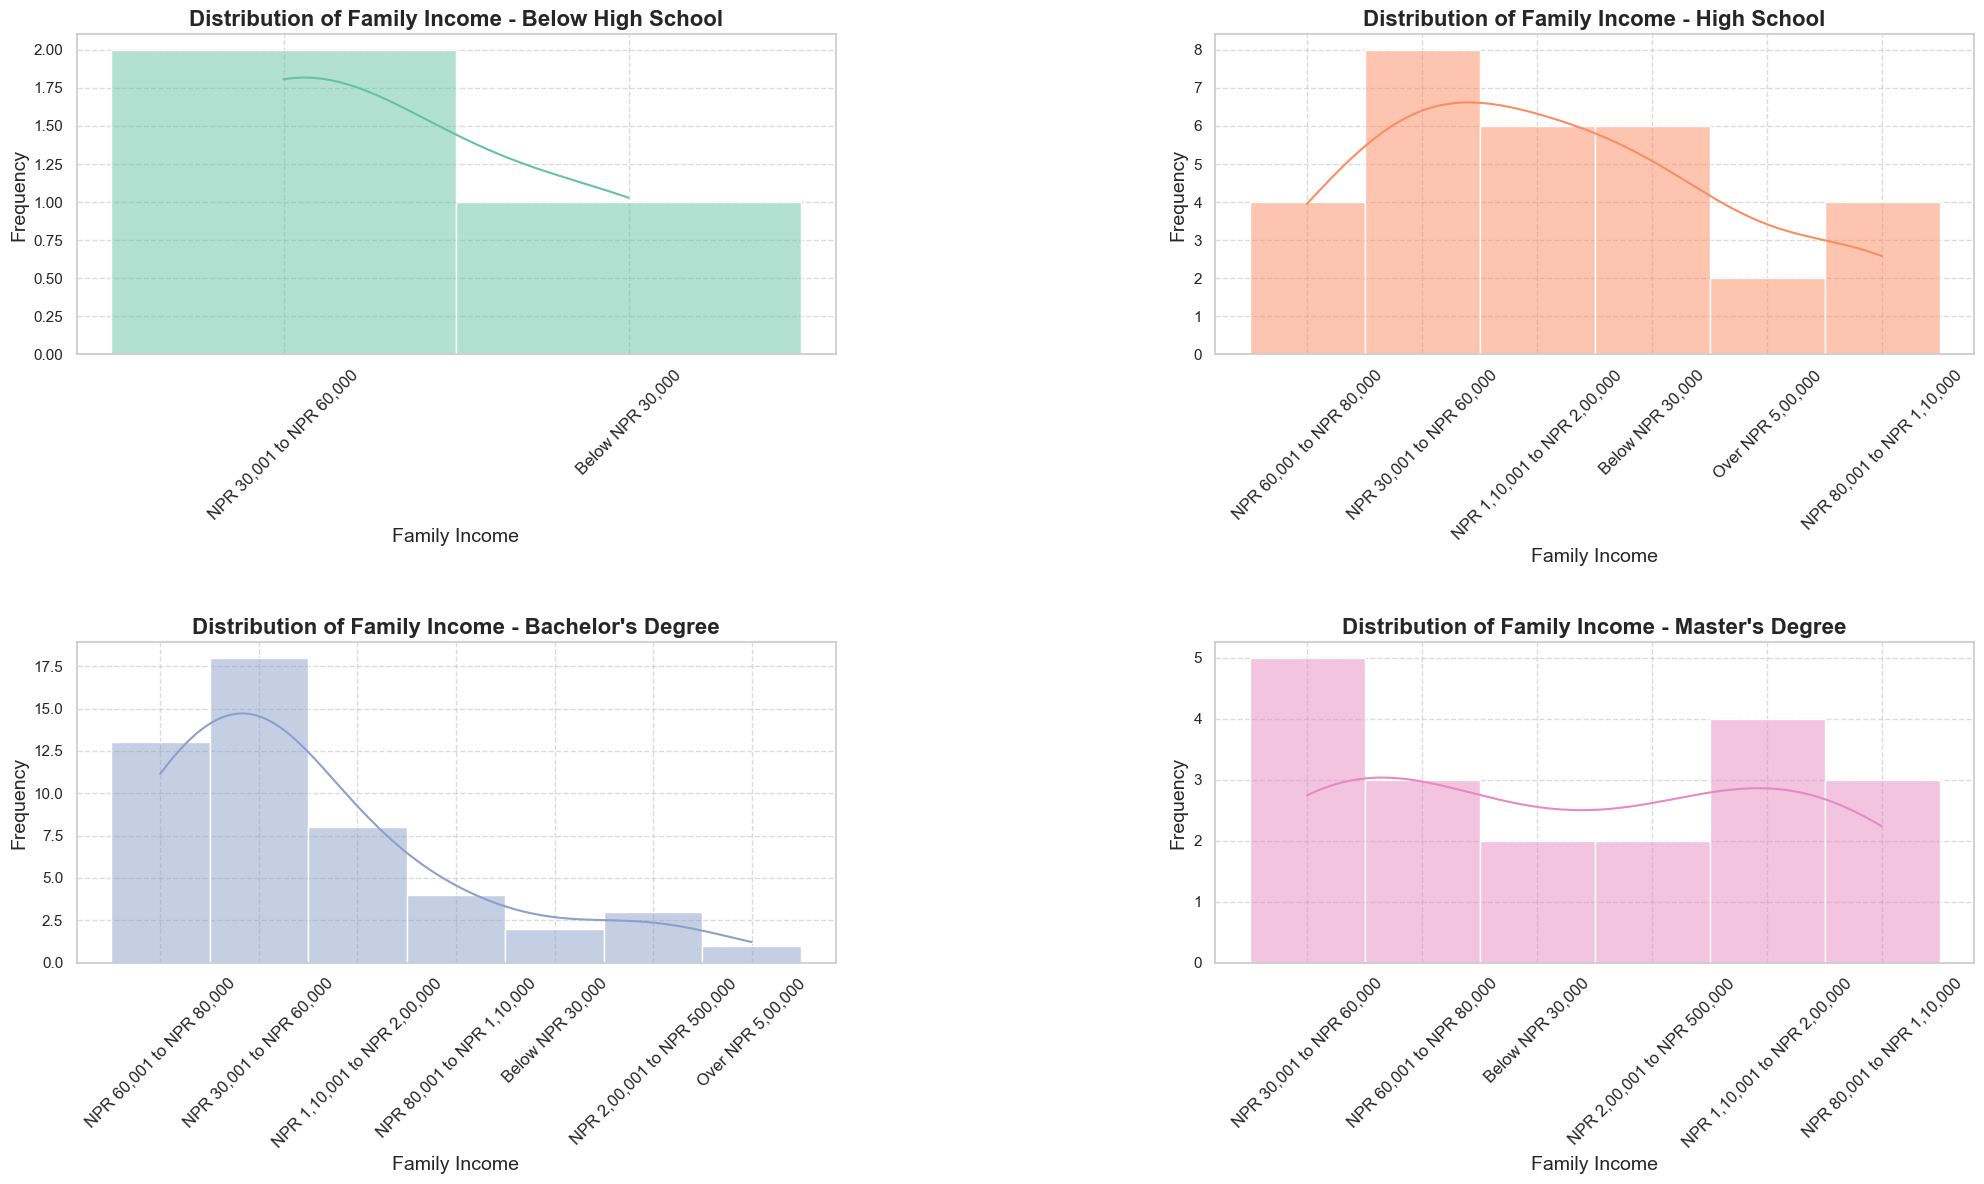

In [34]:
# Ensure 'Education Level' is a categorical type with meaningful labels
education_levels_of_interest = ["Below High School", "High School", "Bachelor's Degree", "Master's Degree"]



#Create subplots
ncols = 2
nrows = (len(education_levels_of_interest) + ncols - 1) // ncols  # Calculate the number of rows needed
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 6 * nrows))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Define custom color palette
palette = sns.color_palette('Set2', n_colors=len(education_levels_of_interest))

# Create a histogram for each education level
for i, level in enumerate(education_levels_of_interest):
    sns.histplot(data=df_copy[df_copy['Education Level'] == level], 
                 x='Family Income', kde=True, color=palette[i], ax=axes[i])
    axes[i].set_title(f'Distribution of Family Income - {level}', fontsize=16,fontweight='bold')
    axes[i].set_xlabel('Family Income', fontsize=14)
    axes[i].set_ylabel('Frequency', fontsize=14)
    axes[i].grid(True, linestyle='--', alpha=0.7)
    axes[i].tick_params(axis='x', rotation=45, labelsize=12)  # Rotate labels by 45 degrees

# Hide unused subplots if there are fewer levels than subplots
for j in range(len(education_levels_of_interest), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap and set spacing
plt.tight_layout()
plt.subplots_adjust(hspace=0.9, wspace=0.5)  # Adjust these values to control spacing
plt.savefig("distirbutuin educationlevel.png")
plt.show()

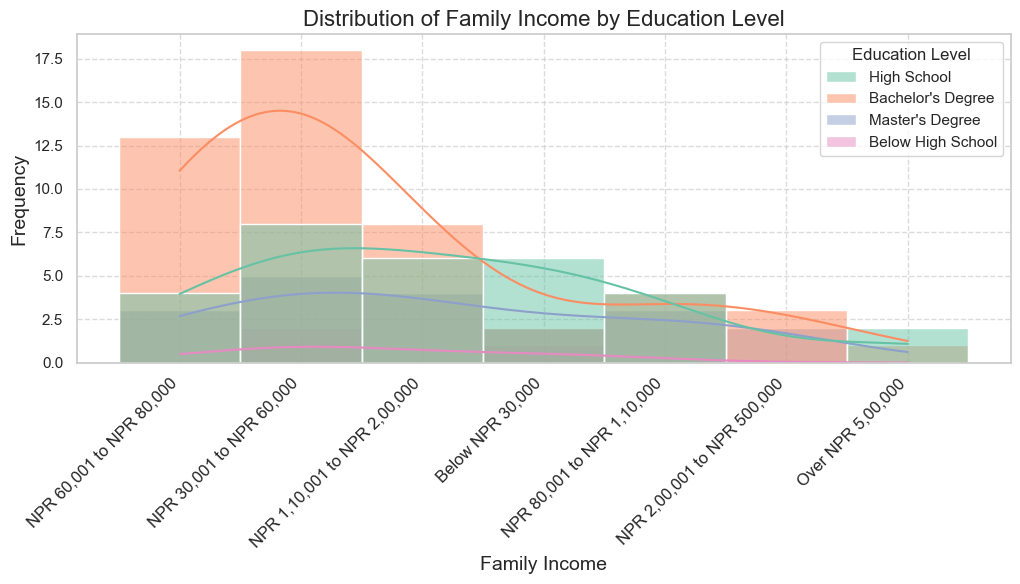

In [35]:
plt.figure(figsize=(20, 6))

# Histogram plot with rotated x-axis labels
plt.subplot(1, 2, 1)
sns.histplot(data=df_copy, x='Family Income', hue='Education Level', kde=True, palette='Set2')
plt.title('Distribution of Family Income by Education Level', fontsize=16)
plt.xlabel('Family Income', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Rotating x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=12) 

# Show plot
plt.tight_layout()
plt.show()


In [36]:
df_copy.head()

,Gender,Age,Education Level,Marital Status,Household Males,Household Females,Educated Family Members,Oldest Child?,Younger Siblings,Older Siblings,Mother’s Education,Father’s Education,Parents’ Jobs,Family Income,Part-Time Work?,District,Family Abroad,Abroad Country,Plans to Study Abroad,Reasons for Staying,Target Study Abroad Country,Planned Year Abroad,Study Subject Abroad,Decision Difficulty,AI Tool Usefulness (1-10),Current Country,Study Start Date,Study Subject,Choosing Difficulty,AI Tool Usefulness (1-10).1,Education Quality,Career Prospects,Political Factors,Social Factors,Economic Factors,Safety/Security,University Preference,Language Access,Cultural Exposure,Research Opportunities,Environmental Factors,AI Familiarity,Key AI Factors,Valuable AI Insights,AI Bias Concerns,Trust in AI,Used AI Tools,Additional Comments,Quality Edu Ranking - A,Quality Edu Ranking - B,Career Rank -A,Career Rank -B,Political Rank -A,Political Rank -B,Social Rank -A,Social Rank -B,Economic Rank -A,Economic Rank -B,Safety Rank -A,Safety Rank -B,University Rank -A,University Rank -B,Language Rank -A,Language Rank -B,Cultural Rank -A,Cultural Rank -B,Research Rank -A,Research Rank -B,Environment Rank -A,Environment Rank -B
0,Male,21-25,High School,Single,2,2,4,Yes,1,NaN,PCL/+2,Bachelor's Degree,Business,"NPR 60,001 to NPR 80,000",Yes,Doti,Yes,Australia,I am already in Abroad,NaN,NaN,NaN,NaN,NaN,NaN,Australia,01/06/2022,Business and Economics,Hard,3.0,Option A,Option B,Option B,Option A,Option A,Option B,Option B,Option B,Option A,Option A,Option A,Moderately familiar,Accuracy and reliability of the recommendations,Choosing a country or region,Neutral,Explanations of the reasoning behind the recom...,NaN,NaN,"Moderately priced tuition fees\n ,High-quality...",NaN,NaN,Abundant availability of part-time job opportu...,NaN,Higher living expenses due to economic challen...,Higher cost of living in socially vibrant urba...,NaN,Access to diverse job opportunities with compe...,NaN,NaN,"Active police presence,Efficient emergency ser...",NaN,Moderately prestige and reputation of universi...,NaN,Different primary language spoken requiring la...,Rich cultural exposure and diversity on campus...,NaN,Abundant research opportunities and resources ...,NaN,Access to clean and sustainable living environ...,NaN
1,Male,21-25,Bachelor's Degree,Single,4,2,3,No,NaN,2,Illiterate,Primary,Non-Governmental Service,"NPR 60,001 to NPR 80,000",Yes,Banke,No,NaN,Yes,NaN,Canada,2026.0,Business and Economics,Hard,8.0,NaN,NaN,NaN,NaN,NaN,Option A,Option A,Option B,Option A,Option A,Option B,Option B,Option A,Option A,Option A,Option A,Slightly familiar,Accuracy and reliability of the recommendation...,"Choosing a country or region,Selecting a speci...",Somewhat concerned,Transparency about the data sources and algori...,NaN,NaN,"High-quality education,Moderately priced tuiti...",NaN,"Higher paygrade\n ,Strong career prospects and...",NaN,NaN,Limited access to civil liberties and freedom ...,Access to diverse social networks and communit...,NaN,Access to diverse job opportunities with compe...,NaN,NaN,"Active police presence,Efficient emergency ser...",NaN,"Diverse availability of desired courses\n ,Mor...",Communication is generally easy due to fluency...,NaN,Rich cultural exposure and diversity on campus...,NaN,Abundant research opportunities and resources ...,NaN,Access to clean and sustainable living environ...,NaN
2,Female,16-20,High School,Single,2,2,2,Yes,1,NaN,Master's Degree,Bachelor's Degree,Non-Governmental Service,"NPR 30,001 to NPR 60,000",No,Kathmandu,No,NaN,Yes,NaN,New Zealand,2025.0,"Humanities (Languages, Literature, History, Ph...",Hard,7.0,NaN,NaN,NaN,NaN,NaN,Option A,Option A,Option B,Option B,Option A,Option B,Option B,Option A,Option B,Option B,Option B,Moderately familiar,Accuracy and reliability of the recommendations,Finding scholarship or financial aid opportuni...,Not very concerned,Endorsements or certifications from reputable ...,NaN,NaN,"Moderately pr

In [37]:
df.columns

Index(['Gender', 'Age', 'Education Level', 'Marital Status', 'Household Males',
       'Household Females', 'Educated Family Members', 'Oldest Child?',
       'Younger Siblings', 'Older Siblings', 'Mother’s Education',
       'Father’s Education', 'Parents’ Jobs', 'Family Income',
       'Part-Time Work?', 'District', 'Family Abroad', 'Abroad Country',
       'Plans to Study Abroad', 'Reasons for Staying',
       'Target Study Abroad Country', 'Planned Year Abroad',
       'Study Subject Abroad', 'Decision Difficulty',
       'AI Tool Usefulness (1-10)', 'Current Country', 'Study Start Date',
       'Study Subject', 'Choosing Difficulty', 'AI Tool Usefulness (1-10).1',
       'Education Quality', 'Career Prospects', 'Political Factors',
       'Social Factors', 'Economic Factors', 'Safety/Security',
       'University Preference', 'Language Access', 'Cultural Exposure',
       'Research Opportunities', 'Environmental Factors', 'AI Familiarity',
       'Key AI Factors', 'Valuable AI Ins

In [38]:
columns_to_drop = [
    'Additional Comments', 'Reasons for Staying', 'Abroad Country', 
     'Decision Difficulty',
    'AI Tool Usefulness (1-10)', 'Current Country', 'Study Start Date', 
    'Choosing Difficulty', 'AI Tool Usefulness (1-10).1','AI Familiarity','Used AI Tools', 'AI Bias Concerns','Valuable AI Insights',
    'AI Familiarity','Trust in AI','Key AI Factors'
]

# Drop the specified columns
updated_df = df.drop(columns=columns_to_drop)

updated_df.head()

,Gender,Age,Education Level,Marital Status,Household Males,Household Females,Educated Family Members,Oldest Child?,Younger Siblings,Older Siblings,Mother’s Education,Father’s Education,Parents’ Jobs,Family Income,Part-Time Work?,District,Family Abroad,Plans to Study Abroad,Target Study Abroad Country,Planned Year Abroad,Study Subject Abroad,Study Subject,Education Quality,Career Prospects,Political Factors,Social Factors,Economic Factors,Safety/Security,University Preference,Language Access,Cultural Exposure,Research Opportunities,Environmental Factors,Quality Edu Ranking - A,Quality Edu Ranking - B,Career Rank -A,Career Rank -B,Political Rank -A,Political Rank -B,Social Rank -A,Social Rank -B,Economic Rank -A,Economic Rank -B,Safety Rank -A,Safety Rank -B,University Rank -A,University Rank -B,Language Rank -A,Language Rank -B,Cultural Rank -A,Cultural Rank -B,Research Rank -A,Research Rank -B,Environment Rank -A,Environment Rank -B
0,0,0,0,0,2,2,4,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,4,2,3,1,1,1,1,1,1,0,0,1,1,1,1,2026.0,1,1,0,0,1,0,0,1,1,0,0,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0
2,1,1,0,0,2,2,2,0,0,0,2,0,1,1,1,2,1,1,2,2025.0,2,1,0,0,1,1,0,1,1,0,1,1,1,0,0,2,1,0,1,2,1,1,0,0,1,0,1,1,1,1,1,2,1,1,1
3,0,1,0,0,2,2,4,1,1,2,3,0,0,2,1,2,1,2,0,NaN,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,2,3,0,1,0,0,1,1,2,2,1,0,0,0,0,0,0
4,1,0,1,0,2,3,4,0,2,0,3,0,1,1,0,3,1,1,3,2025.0,2,1,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,3,0,1,0,0,0,0,1,2,1,0,0,0,0,0,0


In [39]:
filterdf=df_copy.copy()

In [40]:
filterdf.shape

(101, 70)

In [41]:
filterdf.isnull().sum()

Gender                           0
Age                              0
Education Level                  0
Marital Status                   0
Household Males                  0
Household Females                0
Educated Family Members          0
Oldest Child?                    0
Younger Siblings                52
Older Siblings                  49
Mother’s Education               0
Father’s Education               0
Parents’ Jobs                    0
Family Income                    0
Part-Time Work?                  0
District                         0
Family Abroad                    0
Abroad Country                  62
Plans to Study Abroad            0
Reasons for Staying            101
Target Study Abroad Country     58
Planned Year Abroad             58
Study Subject Abroad            58
Decision Difficulty             58
AI Tool Usefulness (1-10)       58
Current Country                 79
Study Start Date                79
Study Subject                   79
Choosing Difficulty 

In [42]:
columns_to_drop = [
    'Additional Comments', 'Reasons for Staying', 'Abroad Country', 
     'Decision Difficulty',
    'AI Tool Usefulness (1-10)', 'Current Country', 'Study Start Date', 
    'Choosing Difficulty', 'AI Tool Usefulness (1-10).1','AI Familiarity','Used AI Tools', 'AI Bias Concerns','Valuable AI Insights',
    'AI Familiarity','Trust in AI','Key AI Factors'
]

# Drop the specified columns
df_copy_filtered = filterdf=df_copy.copy().drop(columns=columns_to_drop)

df_copy_filtered.head()

,Gender,Age,Education Level,Marital Status,Household Males,Household Females,Educated Family Members,Oldest Child?,Younger Siblings,Older Siblings,Mother’s Education,Father’s Education,Parents’ Jobs,Family Income,Part-Time Work?,District,Family Abroad,Plans to Study Abroad,Target Study Abroad Country,Planned Year Abroad,Study Subject Abroad,Study Subject,Education Quality,Career Prospects,Political Factors,Social Factors,Economic Factors,Safety/Security,University Preference,Language Access,Cultural Exposure,Research Opportunities,Environmental Factors,Quality Edu Ranking - A,Quality Edu Ranking - B,Career Rank -A,Career Rank -B,Political Rank -A,Political Rank -B,Social Rank -A,Social Rank -B,Economic Rank -A,Economic Rank -B,Safety Rank -A,Safety Rank -B,University Rank -A,University Rank -B,Language Rank -A,Language Rank -B,Cultural Rank -A,Cultural Rank -B,Research Rank -A,Research Rank -B,Environment Rank -A,Environment Rank -B
0,Male,21-25,High School,Single,2,2,4,Yes,1,NaN,PCL/+2,Bachelor's Degree,Business,"NPR 60,001 to NPR 80,000",Yes,Doti,Yes,I am already in Abroad,NaN,NaN,NaN,Business and Economics,Option A,Option B,Option B,Option A,Option A,Option B,Option B,Option B,Option A,Option A,Option A,"Moderately priced tuition fees\n ,High-quality...",NaN,NaN,Abundant availability of part-time job opportu...,NaN,Higher living expenses due to economic challen...,Higher cost of living in socially vibrant urba...,NaN,Access to diverse job opportunities with compe...,NaN,NaN,"Active police presence,Efficient emergency ser...",NaN,Moderately prestige and reputation of universi...,NaN,Different primary language spoken requiring la...,Rich cultural exposure and diversity on campus...,NaN,Abundant research opportunities and resources ...,NaN,Access to clean and sustainable living environ...,NaN
1,Male,21-25,Bachelor's Degree,Single,4,2,3,No,NaN,2,Illiterate,Primary,Non-Governmental Service,"NPR 60,001 to NPR 80,000",Yes,Banke,No,Yes,Canada,2026.0,Business and Economics,NaN,Option A,Option A,Option B,Option A,Option A,Option B,Option B,Option A,Option A,Option A,Option A,"High-quality education,Moderately priced tuiti...",NaN,"Higher paygrade\n ,Strong career prospects and...",NaN,NaN,Limited access to civil liberties and freedom ...,Access to diverse social networks and communit...,NaN,Access to diverse job opportunities with compe...,NaN,NaN,"Active police presence,Efficient emergency ser...",NaN,"Diverse availability of desired courses\n ,Mor...",Communication is generally easy due to fluency...,NaN,Rich cultural exposure and diversity on campus...,NaN,Abundant research opportunities and resources ...,NaN,Access to clean and sustainable living environ...,NaN
2,Female,16-20,High School,Single,2,2,2,Yes,1,NaN,Master's Degree,Bachelor's Degree,Non-Governmental Service,"NPR 30,001 to NPR 60,000",No,Kathmandu,No,Yes,New Zealand,2025.0,"Humanities (Languages, Literature, History, Ph...",NaN,Option A,Option A,Option B,Option B,Option A,Option B,Option B,Option A,Option B,Option B,Option B,"Moderately priced tuition fees\n ,High-quality...",NaN,"Higher paygrade\n ,Limited availability of par...",NaN,NaN,Limited access to civil liberties and freedom ...,NaN,Abundant opportunities for social interaction\...,Access to diverse job opportunities with compe...,NaN,NaN,"Low crime rates,Efficient emergency services,A...",NaN,"Diverse availability of desired courses\n ,Mor...",Communication is generally easy due to fluency...,NaN,NaN,Limited cultural exposure and diversity on cam...,NaN,"High collaborations with other researchers,Abu...",NaN,Lower cost of living in environmentally divers...
3,Male,16-20,High School,Single,2,2,4,No,NaN,1,Bachelor's Degree,Bachelor's Degree,Business,"NPR 1,10,001 to NPR 2,00,000",No,Kathmandu,No,No plan to go,NaN,NaN,NaN,NaN,Option A,Option A,Option A,Option A,Option A,Option B,Option A,Option A,Option A,Option A,Option A,"High-quality education,Moderately priced tuiti...",NaN,"Higher paygrade\n ,Strong career p

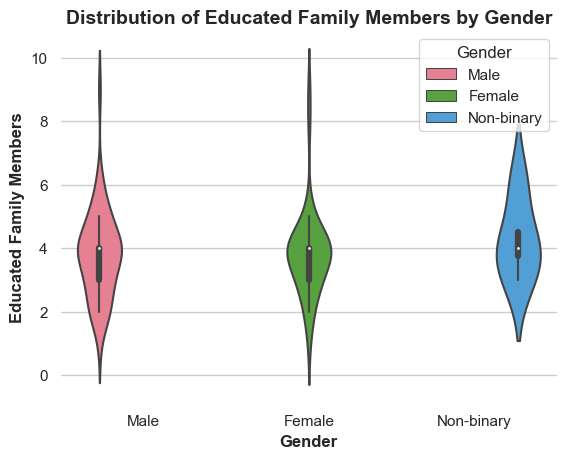

In [43]:
# Create violin plot using Seaborn
ax = sns.violinplot(x='Gender', y='Educated Family Members', hue='Gender', data=df_copy_filtered, palette='husl', split=False)

# Set plot title and axis labels
ax.set_title('Distribution of Educated Family Members by Gender', fontsize=14, fontweight='bold')
ax.set_xlabel('Gender', fontsize=12, fontweight='bold')
ax.set_ylabel('Educated Family Members', fontsize=12, fontweight='bold')


# Remove spines
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()

In [44]:
df_copy.columns

Index(['Gender', 'Age', 'Education Level', 'Marital Status', 'Household Males',
       'Household Females', 'Educated Family Members', 'Oldest Child?',
       'Younger Siblings', 'Older Siblings', 'Mother’s Education',
       'Father’s Education', 'Parents’ Jobs', 'Family Income',
       'Part-Time Work?', 'District', 'Family Abroad', 'Abroad Country',
       'Plans to Study Abroad', 'Reasons for Staying',
       'Target Study Abroad Country', 'Planned Year Abroad',
       'Study Subject Abroad', 'Decision Difficulty',
       'AI Tool Usefulness (1-10)', 'Current Country', 'Study Start Date',
       'Study Subject', 'Choosing Difficulty', 'AI Tool Usefulness (1-10).1',
       'Education Quality', 'Career Prospects', 'Political Factors',
       'Social Factors', 'Economic Factors', 'Safety/Security',
       'University Preference', 'Language Access', 'Cultural Exposure',
       'Research Opportunities', 'Environmental Factors', 'AI Familiarity',
       'Key AI Factors', 'Valuable AI Ins

In [45]:
df.head()

,Gender,Age,Education Level,Marital Status,Household Males,Household Females,Educated Family Members,Oldest Child?,Younger Siblings,Older Siblings,Mother’s Education,Father’s Education,Parents’ Jobs,Family Income,Part-Time Work?,District,Family Abroad,Abroad Country,Plans to Study Abroad,Reasons for Staying,Target Study Abroad Country,Planned Year Abroad,Study Subject Abroad,Decision Difficulty,AI Tool Usefulness (1-10),Current Country,Study Start Date,Study Subject,Choosing Difficulty,AI Tool Usefulness (1-10).1,Education Quality,Career Prospects,Political Factors,Social Factors,Economic Factors,Safety/Security,University Preference,Language Access,Cultural Exposure,Research Opportunities,Environmental Factors,AI Familiarity,Key AI Factors,Valuable AI Insights,AI Bias Concerns,Trust in AI,Used AI Tools,Additional Comments,Quality Edu Ranking - A,Quality Edu Ranking - B,Career Rank -A,Career Rank -B,Political Rank -A,Political Rank -B,Social Rank -A,Social Rank -B,Economic Rank -A,Economic Rank -B,Safety Rank -A,Safety Rank -B,University Rank -A,University Rank -B,Language Rank -A,Language Rank -B,Cultural Rank -A,Cultural Rank -B,Research Rank -A,Research Rank -B,Environment Rank -A,Environment Rank -B
0,0,0,0,0,2,2,4,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,0,0,NaN,0,0,0,0,3.0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,4,2,3,1,1,1,1,1,1,0,0,1,1,1,1,NaN,1,2026.0,1,1,8.0,1,1,1,1,NaN,0,0,1,0,0,1,1,0,0,0,0,1,1,1,1,1,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0
2,1,1,0,0,2,2,2,0,0,0,2,0,1,1,1,2,1,1,1,NaN,2,2025.0,2,1,7.0,1,1,1,1,NaN,0,0,1,1,0,1,1,0,1,1,1,0,0,2,2,2,0,0,0,0,2,1,0,1,2,1,1,0,0,1,0,1,1,1,1,1,2,1,1,1
3,0,1,0,0,2,2,4,1,1,2,3,0,0,2,1,2,1,1,2,NaN,0,NaN,0,0,NaN,1,1,1,1,NaN,0,0,0,0,0,1,0,0,0,0,0,0,2,3,2,3,0,0,1,0,1,1,1,2,3,0,1,0,0,1,1,2,2,1,0,0,0,0,0,0
4,1,0,1,0,2,3,4,0,2,0,3,0,1,1,0,3,1,1,1,NaN,3,2025.0,2,1,7.0,1,1,1,1,NaN,0,1,1,0,0,1,1,0,0,0,0,2,3,4,2,4,0,0,1,0,0,0,0,1,3,0,1,0,0,0,0,1,2,1,0,0,0,0,0,0


# Relationship between having family abroad and planning to study abroad.

Contingency Table:
Family Abroad           0   1
Plans to Study Abroad        
0                      15   7
1                      18  25
2                       6  30

Chi-Square Test Results:
Chi-Square Statistic: 15.621074411959633
P-Value: 0.0004054401844151086
Reject the null hypothesis - There is a significant relationship between having family abroad and planning to study abroad.


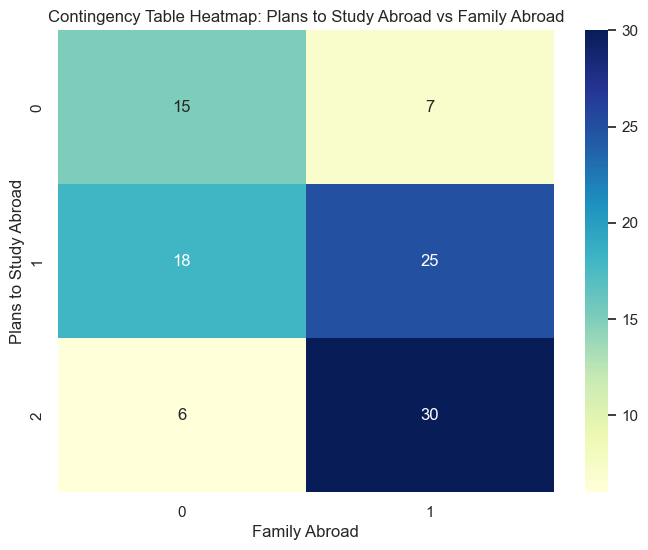

In [46]:
# Focus on the relevant columns
subset_data = df[['Plans to Study Abroad', 'Family Abroad']]

# Check for missing values and handle them
subset_data.dropna(inplace=True)

# Create a contingency table
contingency_table = pd.crosstab(subset_data['Plans to Study Abroad'], subset_data['Family Abroad'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-Square Test Results:\nChi-Square Statistic: {chi2}\nP-Value: {p}")

# Determine significance
alpha = 0.05  # Significance level
if p < alpha:
    print("Reject the null hypothesis - There is a significant relationship between having family abroad and planning to study abroad.")
else:
    print("Fail to reject the null hypothesis - There is no significant relationship between having family abroad and planning to study abroad.")

# Optional: Visualize the relationship
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Contingency Table Heatmap: Plans to Study Abroad vs Family Abroad")
plt.ylabel('Plans to Study Abroad')
plt.xlabel('Family Abroad')
plt.show()

# Statistical test

## t-test 

A t-test is a statistical test used to determine whether there is a significant difference between the means of two groups. In our case, we are using a t-test to determine whether there is a significant difference in the mean hemoglobin levels between males and females.

As we see Hemoglobin have negaive skewness but t-test asumes have normal distribution. So before performing t-test, we  would be taking the logarithm of the data, which can help to reduce the skewness. 



## Chi-square test

Dhi-square test is a statistical test used to determine whether there is a significant association between two categorical variables. In this case, we are using the chi-square test to determine whether there is a significant association between gender and anemia status.


In [47]:
# Initialize summary statistics list
summary_stats = []

# Iterate over columns in df_copy_filtered
for column in df_copy_filtered.columns:
    if df_copy_filtered[column].dtype == 'object' or len(df_copy_filtered[column].unique()) < 20:
        # Categorical data: calculate frequency distribution
        distribution = df_copy_filtered[column].value_counts().to_dict()
        
        # Chi-Square Test example between a categorical variable and another categorical (e.g., 'Plans to Study Abroad')
        if column != 'Plans to Study Abroad':  # 'Plans to Study Abroad' is a target feature
            contingency_table = pd.crosstab(df_copy_filtered[column], df_copy_filtered['Plans to Study Abroad'])
            if not contingency_table.empty:
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                test_result = f"Chi2: {chi2:.4f}, p-value: {p:.4f}"
                significance = "Significant" if p < 0.05 else "Not Significant"
            else:
                test_result = "Chi-Square Test: Not enough data"
                significance = "Not Applicable"
        else:
            test_result = "N/A"
            significance = "N/A"
        
    else:
        # Continuous data: calculate summary statistics
        distribution = {
            "Mean": np.mean(df_copy_filtered[column]),
            "Median": np.median(df_copy_filtered[column]),
            "Std Dev": np.std(df_copy_filtered[column]),
            "Min": np.min(df_copy_filtered[column]),
            "Max": np.max(df_copy_filtered[column])
        }
        
        # Shapiro-Wilk Test for normality
        if df_copy_filtered[column].dropna().size > 3:  # Shapiro-Wilk test requires more than 3 data points
            stat, p_value = shapiro(df_copy_filtered[column].dropna())
            normality_test_result = f"Shapiro-Wilk p-value: {p_value:.4f}"
            significance = "Significant" if p_value < 0.05 else "Not Significant"
        else:
            normality_test_result = "Shapiro-Wilk Test: Not enough data"
            significance = "Not Applicable"
        
        # Assign the normality test result as the primary test result for continuous data
        test_result = normality_test_result

    summary_stats.append({
        "Feature": column,
        "Distribution": distribution,
        "Statistical Test Result": test_result,
        "Significance": significance
    })

# Create a DataFrame to display the results
summary_df = pd.DataFrame(summary_stats)

# Display the summary table
summary_df

,Feature,Distribution,Statistical Test Result,Significance
0,Gender,"{'Male': 54, 'Female': 43, 'Non-binary': 4}","Chi2: 7.7191, p-value: 0.1024",Not Significant
1,Age,"{'21-25': 51, '16-20': 29, '26-30': 18, '31-40...","Chi2: 8.5705, p-value: 0.3798",Not Significant
2,Education Level,"{'Bachelor's Degree': 49, 'High School': 30, '...","Chi2: 14.6450, p-value: 0.0232",Significant
3,Marital Status,"{'Single': 89, 'Married': 11, 'Divorced': 1}","Chi2: 3.9491, p-value: 0.4129",Not Significant
4,Household Males,"{2: 53, 3: 21, 1: 11, 4: 9, 5: 4, 12: 1, 7: 1,...","Chi2: 9.8342, p-value: 0.7742",Not Significant
5,Household Females,"{2: 50, 3: 25, 1: 13, 4: 7, 5: 2, 0: 1, 10: 1,...","Chi2: 13.5824, p-value: 0.6298",Not Significant
6,Educated Family Members,"{4: 44, 3: 22, 2: 13, 5: 13, 6: 4, 9: 2, 1: 2,...","Chi2: 13.2746, p-value: 0.5050",Not Significant
7,Oldest Child?,"{'No': 52, 'Yes': 49}","Chi2: 0.7732, p-value: 0.6794",Not Significant
8,Younger Siblings,"{'1': 38, '2': 6, '3': 4, 'more than 5': 1}","Chi2: 2.0137, p-value: 0.9184",Not Significant
9,Older Siblings,"{'1': 32, '2': 9, '3': 7, '4': 2, 'more than 5...","Chi2: 8.4901, p-value: 0.3871",Not Significant


In [48]:
# # Export summary_df to CSV
# summary_df.to_csv('summary chisquare_df22.csv', index=False)




* Education Level: Found to be significant with a p-value of 0.0232.
* Part-Time Work: Significant with a p-value of 0.0086.
* Family Abroad: Significant with a p-value of 0.0004.
* Environmental Factors: Significant with a p-value of 0.0331.
* Presence of family abroad could be a major influence on students' decisions.

In [49]:
df_copy_filtered.head()

,Gender,Age,Education Level,Marital Status,Household Males,Household Females,Educated Family Members,Oldest Child?,Younger Siblings,Older Siblings,Mother’s Education,Father’s Education,Parents’ Jobs,Family Income,Part-Time Work?,District,Family Abroad,Plans to Study Abroad,Target Study Abroad Country,Planned Year Abroad,Study Subject Abroad,Study Subject,Education Quality,Career Prospects,Political Factors,Social Factors,Economic Factors,Safety/Security,University Preference,Language Access,Cultural Exposure,Research Opportunities,Environmental Factors,Quality Edu Ranking - A,Quality Edu Ranking - B,Career Rank -A,Career Rank -B,Political Rank -A,Political Rank -B,Social Rank -A,Social Rank -B,Economic Rank -A,Economic Rank -B,Safety Rank -A,Safety Rank -B,University Rank -A,University Rank -B,Language Rank -A,Language Rank -B,Cultural Rank -A,Cultural Rank -B,Research Rank -A,Research Rank -B,Environment Rank -A,Environment Rank -B
0,Male,21-25,High School,Single,2,2,4,Yes,1,NaN,PCL/+2,Bachelor's Degree,Business,"NPR 60,001 to NPR 80,000",Yes,Doti,Yes,I am already in Abroad,NaN,NaN,NaN,Business and Economics,Option A,Option B,Option B,Option A,Option A,Option B,Option B,Option B,Option A,Option A,Option A,"Moderately priced tuition fees\n ,High-quality...",NaN,NaN,Abundant availability of part-time job opportu...,NaN,Higher living expenses due to economic challen...,Higher cost of living in socially vibrant urba...,NaN,Access to diverse job opportunities with compe...,NaN,NaN,"Active police presence,Efficient emergency ser...",NaN,Moderately prestige and reputation of universi...,NaN,Different primary language spoken requiring la...,Rich cultural exposure and diversity on campus...,NaN,Abundant research opportunities and resources ...,NaN,Access to clean and sustainable living environ...,NaN
1,Male,21-25,Bachelor's Degree,Single,4,2,3,No,NaN,2,Illiterate,Primary,Non-Governmental Service,"NPR 60,001 to NPR 80,000",Yes,Banke,No,Yes,Canada,2026.0,Business and Economics,NaN,Option A,Option A,Option B,Option A,Option A,Option B,Option B,Option A,Option A,Option A,Option A,"High-quality education,Moderately priced tuiti...",NaN,"Higher paygrade\n ,Strong career prospects and...",NaN,NaN,Limited access to civil liberties and freedom ...,Access to diverse social networks and communit...,NaN,Access to diverse job opportunities with compe...,NaN,NaN,"Active police presence,Efficient emergency ser...",NaN,"Diverse availability of desired courses\n ,Mor...",Communication is generally easy due to fluency...,NaN,Rich cultural exposure and diversity on campus...,NaN,Abundant research opportunities and resources ...,NaN,Access to clean and sustainable living environ...,NaN
2,Female,16-20,High School,Single,2,2,2,Yes,1,NaN,Master's Degree,Bachelor's Degree,Non-Governmental Service,"NPR 30,001 to NPR 60,000",No,Kathmandu,No,Yes,New Zealand,2025.0,"Humanities (Languages, Literature, History, Ph...",NaN,Option A,Option A,Option B,Option B,Option A,Option B,Option B,Option A,Option B,Option B,Option B,"Moderately priced tuition fees\n ,High-quality...",NaN,"Higher paygrade\n ,Limited availability of par...",NaN,NaN,Limited access to civil liberties and freedom ...,NaN,Abundant opportunities for social interaction\...,Access to diverse job opportunities with compe...,NaN,NaN,"Low crime rates,Efficient emergency services,A...",NaN,"Diverse availability of desired courses\n ,Mor...",Communication is generally easy due to fluency...,NaN,NaN,Limited cultural exposure and diversity on cam...,NaN,"High collaborations with other researchers,Abu...",NaN,Lower cost of living in environmentally divers...
3,Male,16-20,High School,Single,2,2,4,No,NaN,1,Bachelor's Degree,Bachelor's Degree,Business,"NPR 1,10,001 to NPR 2,00,000",No,Kathmandu,No,No plan to go,NaN,NaN,NaN,NaN,Option A,Option A,Option A,Option A,Option A,Option B,Option A,Option A,Option A,Option A,Option A,"High-quality education,Moderately priced tuiti...",NaN,"Higher paygrade\n ,Strong career p

Pairplots shows tha relationship and we see Hemoglobin is kind of constant slope with other variable for both anemic and non anemic data.


---

-----


# Feature Selection


With the goal of improving model's performance and interpretability by reducing the number of not important attributes used in the model is termed as feature selection. The study incorporated 

1. correlation-Pearsib correlation fir most correlated values among the dataset
2. SelectKBest identifies features most correlated with the target.
3. RFE (Recursive Feature Elimination) selects features based on their importance within a model.
4. Extree Tree Classifier provide insights into the features that have the greatest predictive power.
5. Mutual Information captures non-linear relationships between features and the target.
6. Lasso Regularization prioritizes features while enforcing simplicity by shrinking less important coefficients to zero.


# Extremely Randomized Trees

An ensemble learning method that creates multiple decision trees with randomized splits, providing robust feature importance scores. With this ranking scores, we can identify the most influential features.


# Mutual Information

* It measures the dependency between features and the target variable.It quantifies how much knowing the value of one feature reduces uncertainty about the target variable.
* Data seems to have non-linear association so Mutual information seems to me more versatile. 

# Lasso model

* Least Absolute Shrinkage and Selection Operator) is a regularization technique that applies a penalty to the model’s coefficients. 

* It effectively "shrinks" some coefficients to zero, thereby performing feature selection.

* Handles multicollinearity well, selects relevant features by reducing less important feature coefficients to zero, and is useful for high-dimensional datasets.

                   Feature  Coefficient
50     Environment Rank -A     0.928689
32          Career Rank -A     0.804048
22          Social Factors     0.434113
28  Research Opportunities     0.207075
24         Safety/Security     0.156871
23        Economic Factors     0.122152
38        Economic Rank -A     0.052644
9           Older Siblings     0.033876
1                      Age     0.000000
21       Political Factors     0.000000


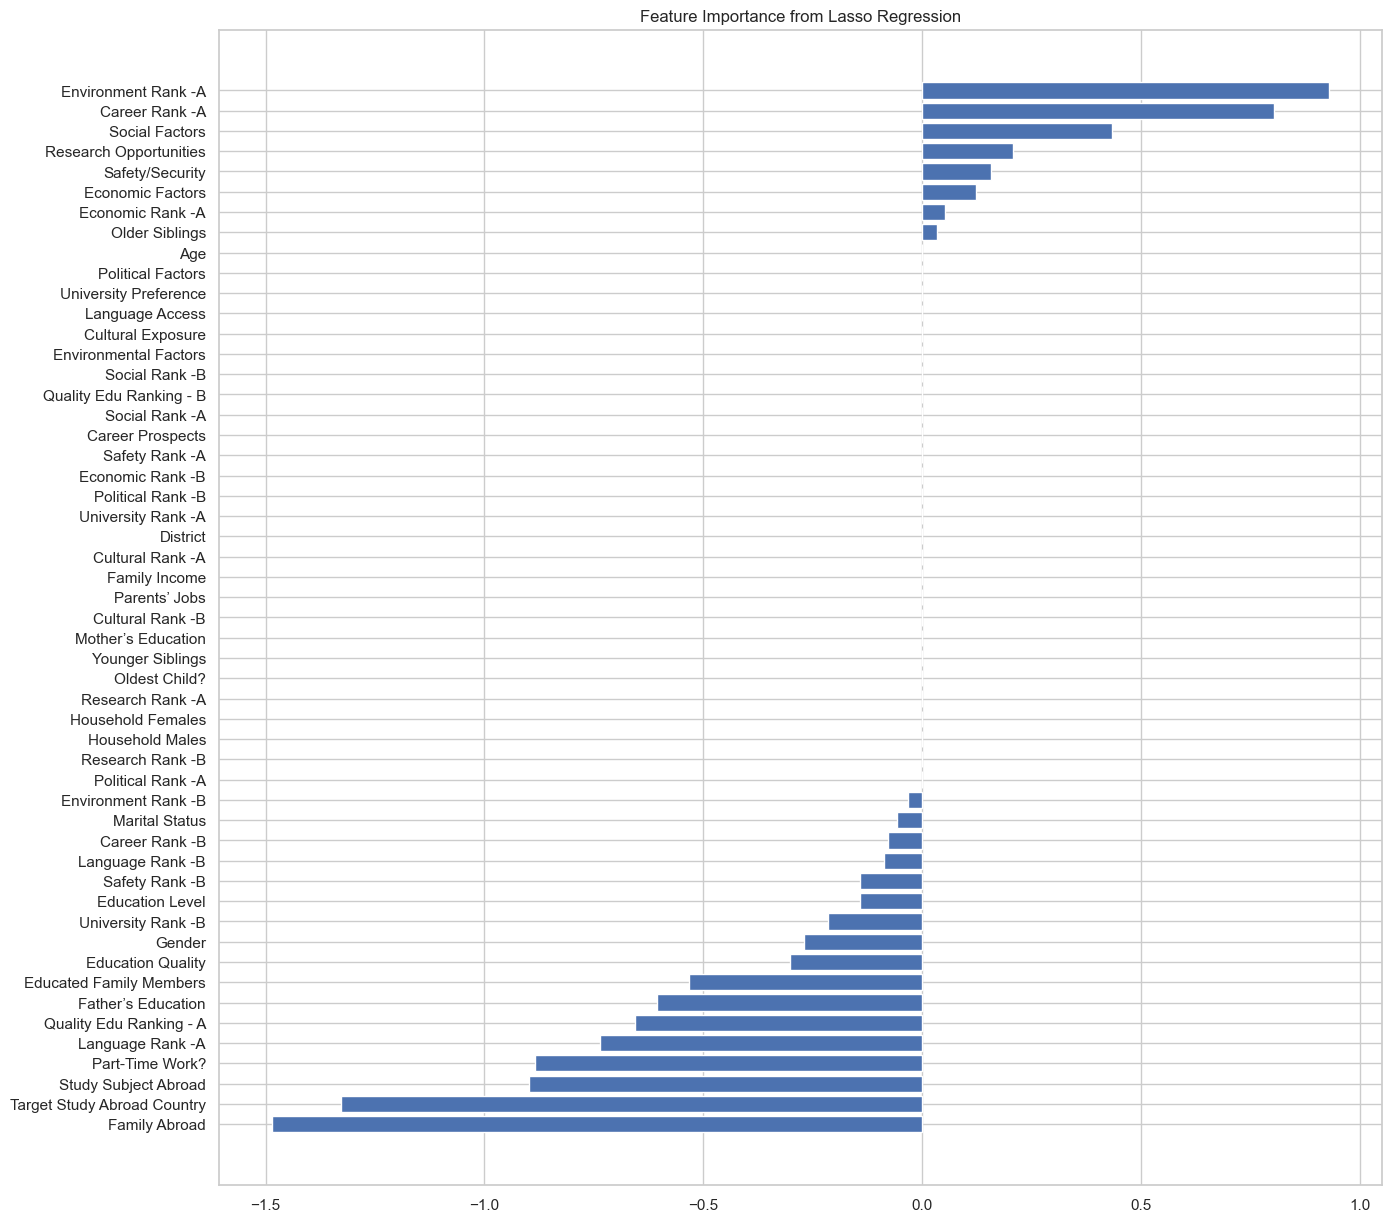

In [57]:

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train a Lasso model
lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=10000)
lasso.fit(X_scaled, y)

# Get the coefficients
coefficients = lasso.coef_[0]

# For visualization
lasso_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print(lasso_df.head(10))  # Display top 10 features

# Plot the coefficients
plt.figure(figsize=(15, 15))
plt.barh(lasso_df['Feature'], lasso_df['Coefficient'])
plt.title("Feature Importance from Lasso Regression")
plt.gca().invert_yaxis()
plt.show()


In [106]:
 # Independent columns
    
X = updated_df[['Gender', 'Age', 'Education Level', 'Marital Status', 'Household Males',
       'Household Females', 'Educated Family Members', 'Oldest Child?',
       'Younger Siblings', 'Older Siblings', 'Mother’s Education',
       'Father’s Education', 'Parents’ Jobs', 'Family Income',
       'Part-Time Work?', 'District', 'Family Abroad',
       'Target Study Abroad Country',
       'Study Subject Abroad',  'Education Quality',
       'Career Prospects', 'Political Factors', 'Social Factors',
       'Economic Factors', 'Safety/Security', 'University Preference',
       'Language Access', 'Cultural Exposure', 'Research Opportunities',
       'Environmental Factors', 'Quality Edu Ranking - A',
       'Quality Edu Ranking - B', 'Career Rank -A', 'Career Rank -B',
       'Political Rank -A', 'Political Rank -B', 'Social Rank -A',
       'Social Rank -B', 'Economic Rank -A', 'Economic Rank -B',
       'Safety Rank -A', 'Safety Rank -B', 'University Rank -A',
       'University Rank -B', 'Language Rank -A', 'Language Rank -B',
       'Cultural Rank -A', 'Cultural Rank -B', 'Research Rank -A',
       'Research Rank -B', 'Environment Rank -A', 'Environment Rank -B']] 
y = updated_df['Plans to Study Abroad']  # target variable

# Correlation Scores
corr_scores = X.corrwith(y).abs()

# SelectKBest with Mutual Information
mi = SelectKBest(score_func=mutual_info_classif, k='all')
mi.fit(X, y)
mi_scores = pd.Series(mi.scores_, index=X.columns)

# Extremely Randomized Trees
ext_tree = ExtraTreesClassifier(n_estimators=100)
ext_tree.fit(X, y)
ext_tree_scores = pd.Series(ext_tree.feature_importances_, index=X.columns)

# Lasso Regularization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
lasso = Lasso(alpha=0.01)
lasso.fit(X_scaled, y)
lasso_scores = pd.Series(np.abs(lasso.coef_), index=X.columns)

# Normalize the Scores
corr_scores_norm = corr_scores / corr_scores.max()
mi_scores_norm = mi_scores / mi_scores.max()
ext_tree_scores_norm = ext_tree_scores / ext_tree_scores.max()
lasso_scores_norm = lasso_scores / lasso_scores.max()

#  Calculate the Combined Score
combined_scores = (corr_scores_norm + mi_scores_norm + ext_tree_scores_norm + lasso_scores_norm) / 4

# Select All Features
top_features = combined_scores.sort_values(ascending=False).head(53)
print("Top Features:\n", top_features)


Top Features:
 Target Study Abroad Country    0.613724
Study Subject Abroad           0.576156
Family Abroad                  0.530095
Part-Time Work?                0.407096
Language Rank -A               0.391861
Language Rank -B               0.273571
Environment Rank -A            0.245153
Environment Rank -B            0.201996
Environmental Factors          0.194990
Father’s Education             0.182328
Safety/Security                0.175755
Cultural Exposure              0.169895
Social Factors                 0.167468
Career Rank -A                 0.159549
Parents’ Jobs                  0.158862
Economic Rank -A               0.155907
Political Factors              0.153694
Gender                         0.149604
Political Rank -A              0.146321
Research Opportunities         0.132486
Education Level                0.132177
Education Quality              0.130666
Marital Status                 0.126987
Quality Edu Ranking - A        0.122589
Career Rank -B           

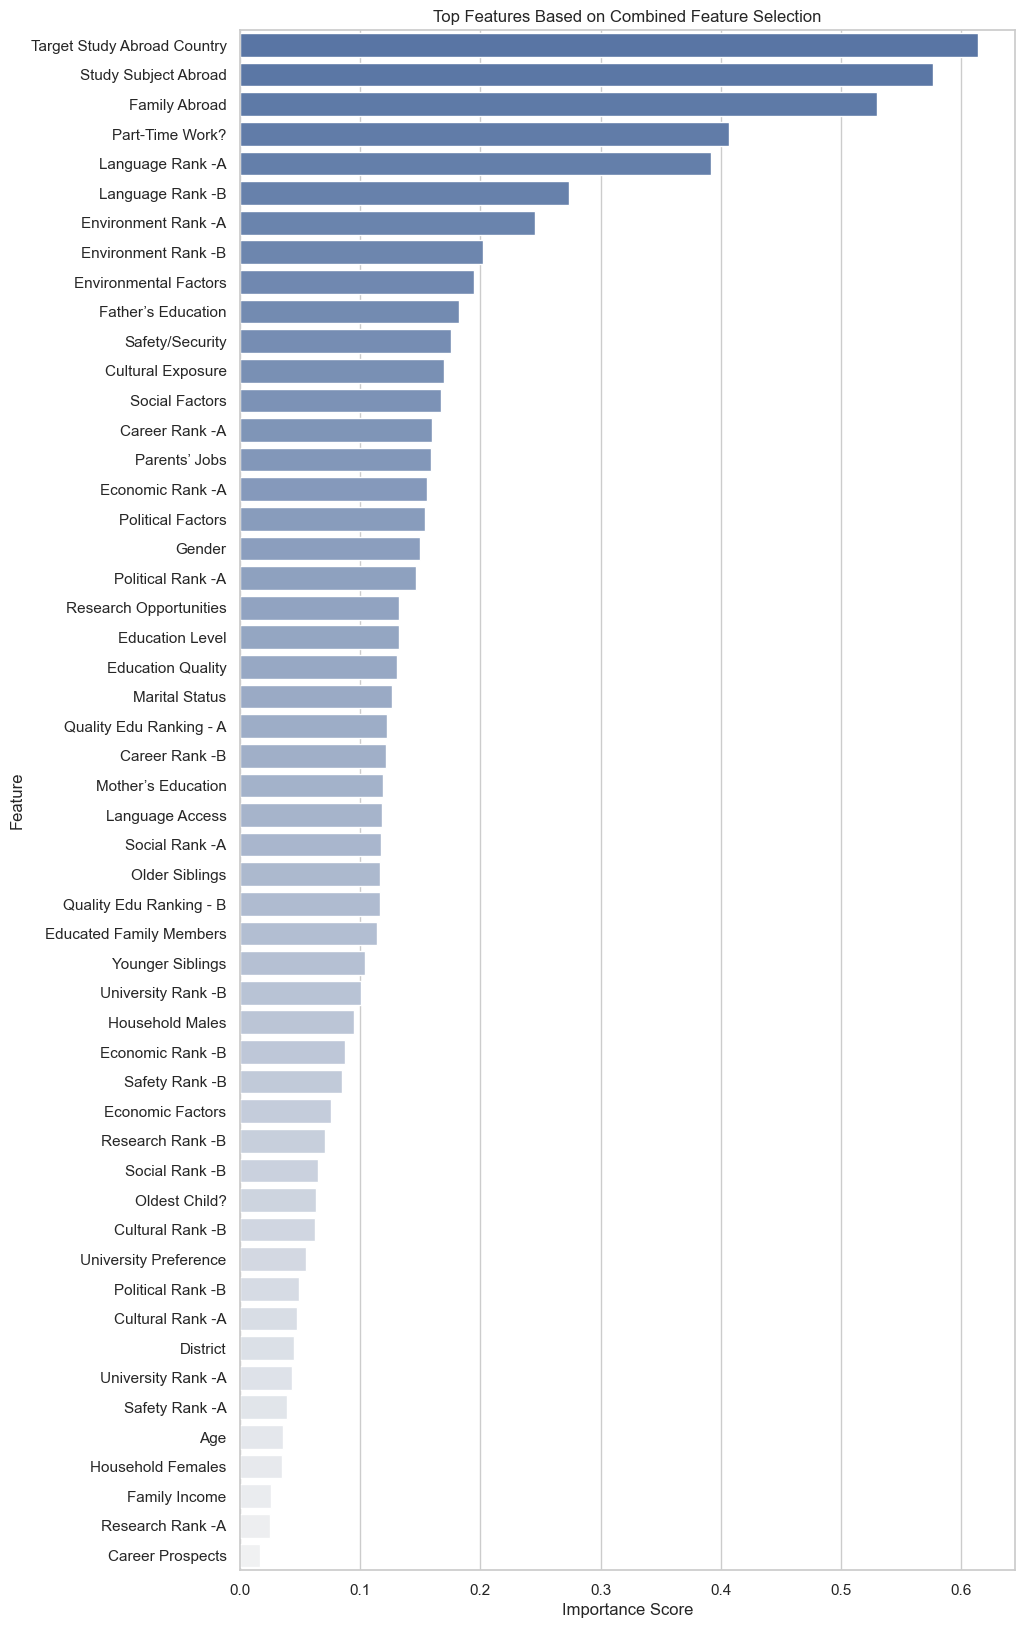

<Figure size 640x480 with 0 Axes>

In [107]:
top_features_df = top_features.reset_index()
top_features_df.columns = ['Feature', 'Combined Score']

# Plotting the top features
plt.figure(figsize=(10, 20))
sns.barplot(x='Combined Score', y='Feature', data=top_features_df, palette='light:b_r')
plt.title('Top Features Based on Combined Feature Selection')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()
plt.savefig("Top Features Based on Combined Feature Selection.png")


In [108]:

# Combining the individual scores into a DataFrame
scores_df = pd.DataFrame({
    'Feature': X.columns,
    'Correlation Score': corr_scores,
    'Mutual Information Score': mi_scores,
    'Extremely Randomized Trees Score': ext_tree_scores,
    'Lasso Score': lasso_scores,
    'Combined Score': combined_scores
})

# Sort the DataFrame by the Combined Score
scores_df = scores_df.sort_values(by='Combined Score', ascending=False).reset_index(drop=True)


# Display the table with all the scores
print("Top Features with Individual and Combined Scores:")
print(scores_df)


# Export CSV file
csv_filename = "feature_selection_scoresrank.csv"
scores_df.to_csv(csv_filename, index=False)
print(f"Feature selection scores saved to {csv_filename}")


Top Features with Individual and Combined Scores:
                        Feature  Correlation Score  Mutual Information Score  \
0   Target Study Abroad Country           0.147135                  0.572524   
1          Study Subject Abroad           0.148083                  0.531329   
2                 Family Abroad           0.393233                  0.043850   
3               Part-Time Work?           0.306966                  0.032186   
4              Language Rank -A           0.206714                  0.000322   
5              Language Rank -B           0.105071                  0.000000   
6           Environment Rank -A           0.154719                  0.033338   
7           Environment Rank -B           0.279918                  0.000000   
8         Environmental Factors           0.234415                  0.000000   
9            Father’s Education           0.072731                  0.001127   
10              Safety/Security           0.064866                  0.

In [109]:
 # Pulling to the list

feature_list_ranking = scores_df['Feature'].tolist()

# Display the list
print(feature_list_ranking)

['Target Study Abroad Country', 'Study Subject Abroad', 'Family Abroad', 'Part-Time Work?', 'Language Rank -A', 'Language Rank -B', 'Environment Rank -A', 'Environment Rank -B', 'Environmental Factors', 'Father’s Education', 'Safety/Security', 'Cultural Exposure', 'Social Factors', 'Career Rank -A', 'Parents’ Jobs', 'Economic Rank -A', 'Political Factors', 'Gender', 'Political Rank -A', 'Research Opportunities', 'Education Level', 'Education Quality', 'Marital Status', 'Quality Edu Ranking - A', 'Career Rank -B', 'Mother’s Education', 'Language Access', 'Social Rank -A', 'Older Siblings', 'Quality Edu Ranking - B', 'Educated Family Members', 'Younger Siblings', 'University Rank -B', 'Household Males', 'Economic Rank -B', 'Safety Rank -B', 'Economic Factors', 'Research Rank -B', 'Social Rank -B', 'Oldest Child?', 'Cultural Rank -B', 'University Preference', 'Political Rank -B', 'Cultural Rank -A', 'District', 'University Rank -A', 'Safety Rank -A', 'Age', 'Household Females', 'Family In

In [94]:
# Select the top features (adjust the number as needed)
top_features_df = scores_df.head(10)  # Displaying top 20 features for demonstration

# Display the table with all the scores
print("Top Features with Individual and Combined Scores:")
print(top_features_df)

Top Features with Individual and Combined Scores:
                       Feature  Correlation Score  Mutual Information Score  \
0  Target Study Abroad Country           0.147135                  0.592508   
1         Study Subject Abroad           0.148083                  0.529835   
2                Family Abroad           0.393233                  0.000000   
3              Part-Time Work?           0.306966                  0.106969   
4             Language Rank -A           0.206714                  0.000000   
5             Language Rank -B           0.105071                  0.000000   
6          Environment Rank -A           0.154719                  0.039505   
7          Environment Rank -B           0.279918                  0.009253   
8               Social Factors           0.081584                  0.078475   
9        Environmental Factors           0.234415                  0.011555   

   Extremely Randomized Trees Score  Lasso Score  Combined Score  
0            

Consensus Features:
> So, The features "Family Aborad," "Target Study Abroad Country," and "Study Subject Abroad" are top 3

Now we know these these feature are most go for the model creation. 



----

In [95]:
 # Independent columns
    
X = updated_df[['Gender', 'Age', 'Education Level', 'Marital Status', 'Household Males',
       'Household Females', 'Educated Family Members', 'Oldest Child?',
       'Younger Siblings', 'Older Siblings', 'Mother’s Education',
       'Father’s Education', 'Parents’ Jobs', 'Family Income',
       'Part-Time Work?', 'District', 'Family Abroad',
       'Target Study Abroad Country',
       'Study Subject Abroad',  'Education Quality',
       'Career Prospects', 'Political Factors', 'Social Factors',
       'Economic Factors', 'Safety/Security', 'University Preference',
       'Language Access', 'Cultural Exposure', 'Research Opportunities',
       'Environmental Factors']] 
y = updated_df['Plans to Study Abroad']  # target variable

# Correlation Scores
corr_scores = X.corrwith(y).abs()

# SelectKBest with Mutual Information
mi = SelectKBest(score_func=mutual_info_classif, k='all')
mi.fit(X, y)
mi_scores = pd.Series(mi.scores_, index=X.columns)

# Extremely Randomized Trees
ext_tree = ExtraTreesClassifier(n_estimators=100)
ext_tree.fit(X, y)
ext_tree_scores = pd.Series(ext_tree.feature_importances_, index=X.columns)

# Lasso Regularization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
lasso = Lasso(alpha=0.01)
lasso.fit(X_scaled, y)
lasso_scores = pd.Series(np.abs(lasso.coef_), index=X.columns)

# Normalize the Scores
corr_scores_norm = corr_scores / corr_scores.max()
mi_scores_norm = mi_scores / mi_scores.max()
ext_tree_scores_norm = ext_tree_scores / ext_tree_scores.max()
lasso_scores_norm = lasso_scores / lasso_scores.max()

#  Calculate the Combined Score
combined_scores = (corr_scores_norm + mi_scores_norm + ext_tree_scores_norm + lasso_scores_norm) / 4

# Select All Features
top_features = combined_scores.sort_values(ascending=False).head(53)
print("Top Features:\n", top_features)


Top Features:
 Target Study Abroad Country    0.628144
Family Abroad                  0.598674
Study Subject Abroad           0.544629
Part-Time Work?                0.489510
Environmental Factors          0.287008
Marital Status                 0.220199
Father’s Education             0.218725
Education Quality              0.209502
Older Siblings                 0.207189
Social Factors                 0.205148
Cultural Exposure              0.183577
Language Access                0.180137
Parents’ Jobs                  0.178254
Research Opportunities         0.170979
Gender                         0.157680
Safety/Security                0.139362
Educated Family Members        0.128922
Mother’s Education             0.127535
Education Level                0.103692
Household Males                0.081707
Economic Factors               0.075015
Political Factors              0.068300
Oldest Child?                  0.066804
University Preference          0.064834
Household Females        

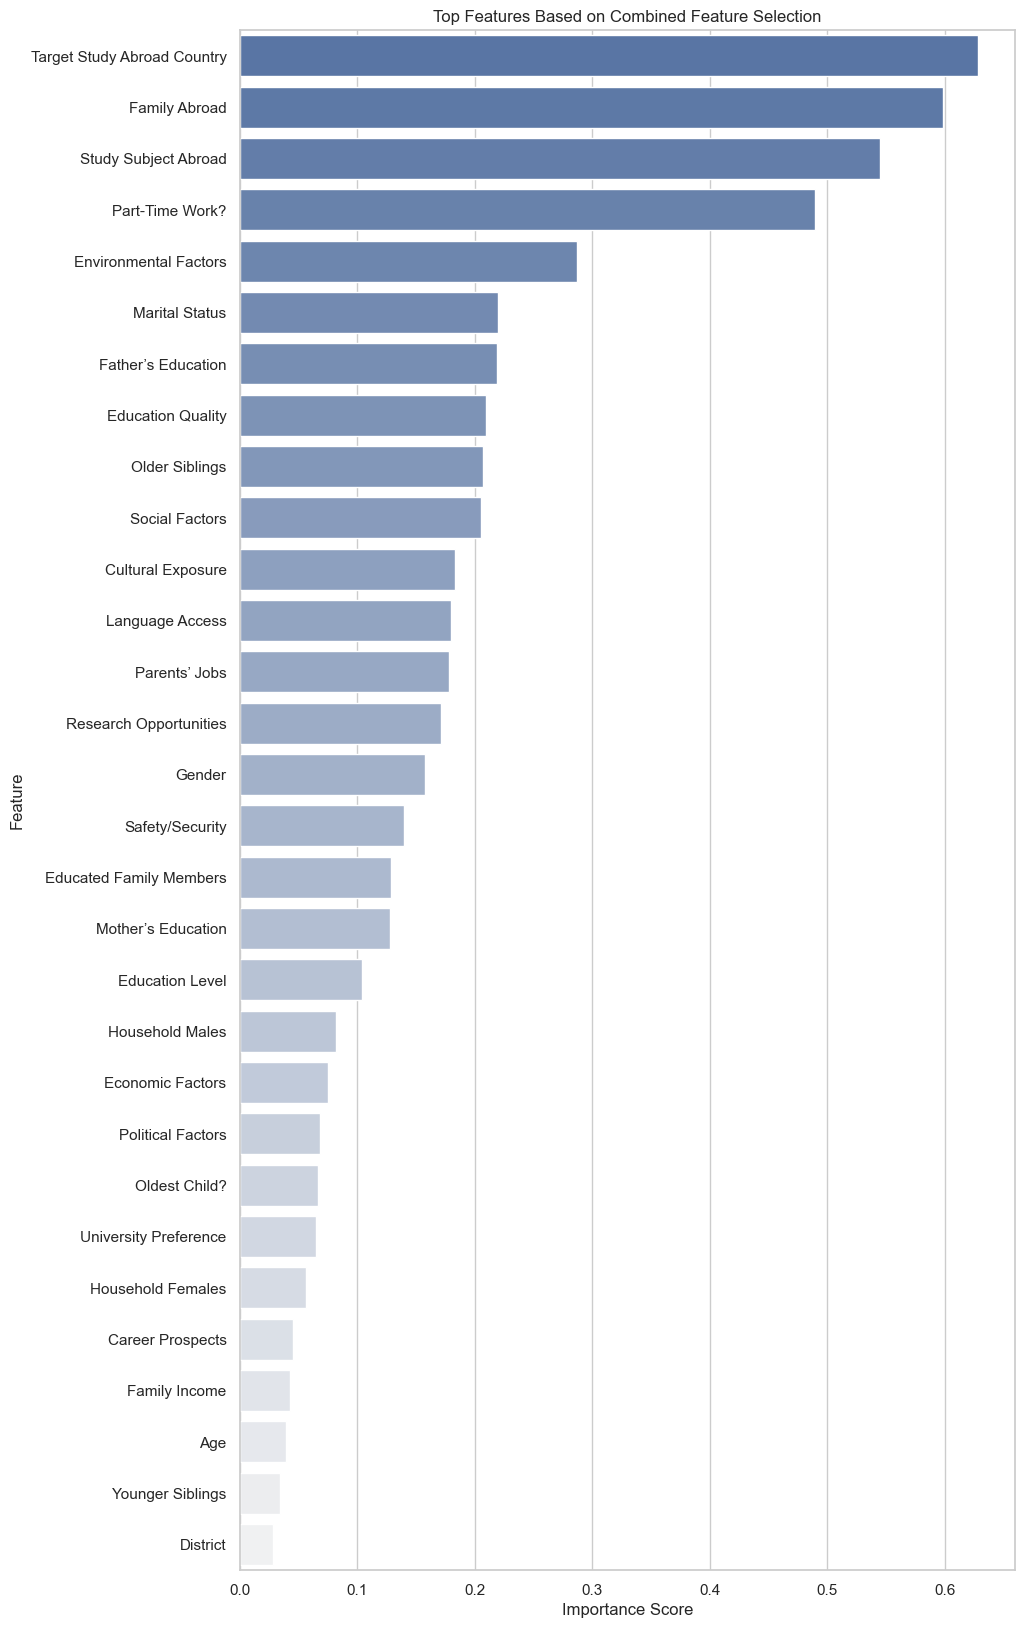

<Figure size 640x480 with 0 Axes>

In [96]:
top_features_df = top_features.reset_index()
top_features_df.columns = ['Feature', 'Combined Score']

# Plotting the top features
plt.figure(figsize=(10, 20))
sns.barplot(x='Combined Score', y='Feature', data=top_features_df, palette='light:b_r')
plt.title('Top Features Based on Combined Feature Selection')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()
plt.savefig("Top Features Based on Combined Feature Selection no rank.png")


In [97]:

# Combining the individual scores into a DataFrame
scores_df = pd.DataFrame({
    'Feature': X.columns,
    'Correlation Score': corr_scores,
    'Mutual Information Score': mi_scores,
    'Extremely Randomized Trees Score': ext_tree_scores,
    'Lasso Score': lasso_scores,
    'Combined Score': combined_scores
})

# Sort the DataFrame by the Combined Score
scores_df = scores_df.sort_values(by='Combined Score', ascending=False).reset_index(drop=True)


# Display the table with all the scores
print("Top Features with Individual and Combined Scores:")
print(scores_df)


# Export CSV file
csv_filename = "feature_selection_scoresNOrank.csv"
scores_df.to_csv(csv_filename, index=False)
print(f"Feature selection scores saved to {csv_filename}")


Top Features with Individual and Combined Scores:
                        Feature  Correlation Score  Mutual Information Score  \
0   Target Study Abroad Country           0.147135                  0.569617   
1                 Family Abroad           0.393233                  0.121357   
2          Study Subject Abroad           0.148083                  0.460373   
3               Part-Time Work?           0.306966                  0.020899   
4         Environmental Factors           0.234415                  0.007426   
5                Marital Status           0.153588                  0.132935   
6            Father’s Education           0.072731                  0.000224   
7             Education Quality           0.140989                  0.060187   
8                Older Siblings           0.122532                  0.182747   
9                Social Factors           0.081584                  0.076971   
10            Cultural Exposure           0.047533                  0.

In [104]:
 # Pulling to the list

feature_list = scores_df['Feature'].tolist()

# Display the list
print(feature_list)

['Target Study Abroad Country', 'Family Abroad', 'Study Subject Abroad', 'Part-Time Work?', 'Environmental Factors', 'Marital Status', 'Father’s Education', 'Education Quality', 'Older Siblings', 'Social Factors', 'Cultural Exposure', 'Language Access', 'Parents’ Jobs', 'Research Opportunities', 'Gender', 'Safety/Security', 'Educated Family Members', 'Mother’s Education', 'Education Level', 'Household Males', 'Economic Factors', 'Political Factors', 'Oldest Child?', 'University Preference', 'Household Females', 'Career Prospects', 'Family Income', 'Age', 'Younger Siblings', 'District']


----------